# <span style="color:orange"> Numerical Simulation Laboratory </span>
## <span style="color:purple"> Exercise 11: Keras - Neural Network regression </span>

## <span style="color:green">Exercise 11.1 Linear fit</span>

We start by considering the very simple case:
$$
f(x)=2x+1
$$

In order to make practice with NN, we explore how does this linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. 
We define some function in order to be able to change some of these parameter easily and plot the results.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

sigma = 0.0 # noise standard deviation, for the moment it is absent

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function
y_valid = np.random.normal(m * x_valid + b, sigma)

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters

######################################
step_epoch = 30

def Do_model_epochs(i):

  ep = step_epoch*(i+1)

  model = tf.keras.Sequential()
  model.add(Dense(1, input_shape=(1,)))
  model.compile(optimizer='sgd', loss='mse', metrics=['mse']) # compile the model choosing optimizer, loss and metrics objects  
  history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=ep,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0)
  
  score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
 
  fig, axs = plt.subplots(1,2, figsize = (20,5)  )
  fig.suptitle(" # Epochs: "+str(ep) , fontsize = 20)
  axs[0].plot(history.history['loss'])
  axs[0].plot(history.history['val_loss'])
  axs[0].set_title('Model loss')
  axs[0].set_ylabel('Loss')
  axs[0].set_xlabel('Epoch')

  axs[0].grid(True)
  axs[0].legend(['Train', 'Test'], loc='best')

  x_predicted = np.random.uniform(-1, 1, 100)
  y_predicted = model.predict(x_predicted)
  axs[1].scatter(x_predicted, y_predicted,color='r')
  axs[1].plot(x_valid, y_target)
  axs[1].set_title("Prediction")
  axs[1].grid(True)

  fig.text(0.2,-0.2, ' Test loss: '+ str(score[0]) +
    '\n Test accuracy:' + str( score[1]) +
    '\n Parameters: ' + str( model.get_weights() ) , fontsize =13)

  fig.show()

  return score


######################################################
N_train0 = 200
N_train_step = 200

def Do_model_N_train(i,ep):
  N_train = N_train0 + N_train_step*i
  x_train = np.random.uniform(-1, 1, N_train)
  y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters

  model = tf.keras.Sequential()
  model.add(Dense(1, input_shape=(1,)))
  model.compile(optimizer='sgd', loss='mse', metrics=['mse']) # compile the model choosing optimizer, loss and metrics objects  
  history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=ep,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0)
  
  score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
 
  fig, axs = plt.subplots(1,2, figsize = (20,5)  )
  fig.suptitle(" # N_train : "+str(N_train) , fontsize = 20)
  axs[0].plot(history.history['loss'])
  axs[0].plot(history.history['val_loss'])
  axs[0].set_title('Model loss')
  axs[0].set_ylabel('Loss')
  axs[0].set_xlabel('Epoch')
  axs[0].grid(True)
  axs[0].legend(['Train', 'Test'], loc='best')

  x_predicted = np.random.uniform(-1, 1, 100)
  y_predicted = model.predict(x_predicted)
  axs[1].scatter(x_predicted, y_predicted,color='r')
  axs[1].plot(x_valid, y_target)
  axs[1].set_title("Prediction")
  axs[1].grid(True)
  
  fig.text(0.2,-0.2, ' Test loss: '+ str(score[0]) +
    '\n Test accuracy:' + str( score[1]) +
    '\n Parameters: ' + str( model.get_weights() ) , fontsize =13)
  fig.show()

  return score

####################################################à
sigma_step = 0.15 

def Do_model_sigma(i):
  N_train = 500 
  ep = 60
  sigma = sigma_step*i
  x_train = np.random.uniform(-1, 1, N_train)
  y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
  y_valid = np.random.normal(m * x_valid + b, sigma)

  model = tf.keras.Sequential()
  model.add(Dense(1, input_shape=(1,)))
  model.compile(optimizer='sgd', loss='mse', metrics=['mse']) # compile the model choosing optimizer, loss and metrics objects  
  history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=ep,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid),
          verbose = 0)
  
  score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
 
  fig, axs = plt.subplots(1,2, figsize = (20,5)  )
  fig.suptitle(" Sigma : "+str(sigma) , fontsize = 20)
  axs[0].plot(history.history['loss'])
  axs[0].plot(history.history['val_loss'])
  axs[0].set_title('Model loss')
  axs[0].set_ylabel('Loss')
  axs[0].set_xlabel('Epoch')
  axs[0].grid(True)
  axs[0].legend(['Train', 'Test'], loc='best')

  x_predicted = np.random.uniform(-1, 1, 100)
  y_predicted = model.predict(x_predicted)
  axs[1].scatter(x_predicted, y_predicted,color='r')
  axs[1].plot(x_valid, y_target)
  axs[1].set_title("Prediction")
  axs[1].grid(True )

  fig.text(0.2,-0.2, ' Test loss: '+ str(score[0]) +
    '\n Test accuracy:' + str( score[1]) +
    '\n Parameters: ' + str( model.get_weights() ) , fontsize =13)
  
  fig.show()

  return score




## Experimenting on: number of epochs
We try to increase the number of epochs in order to see if we can obtain better result. To judge we refer to the test_loss and the fit in the graph.

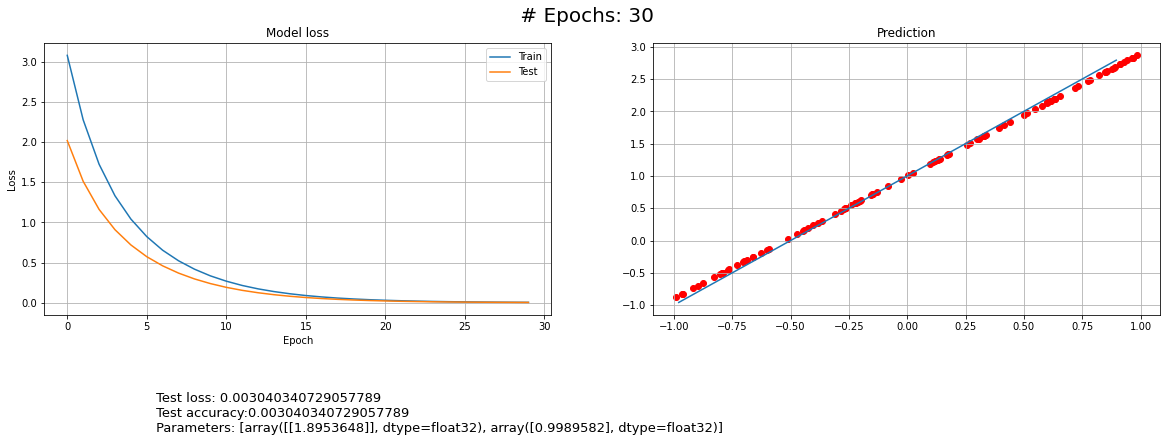

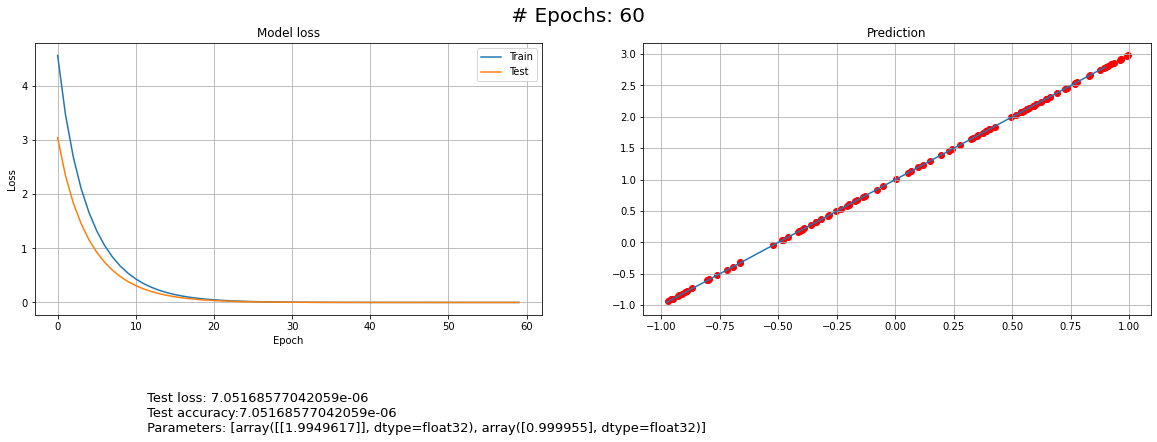

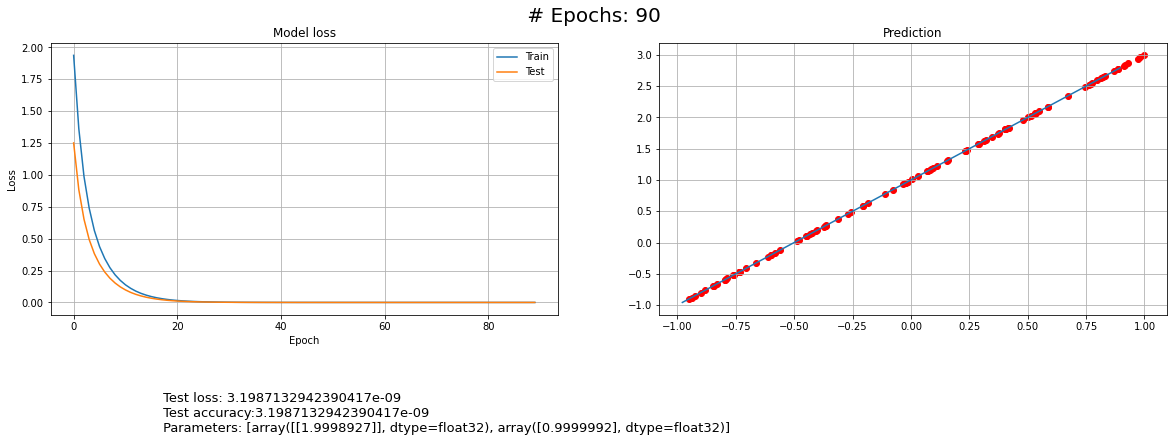

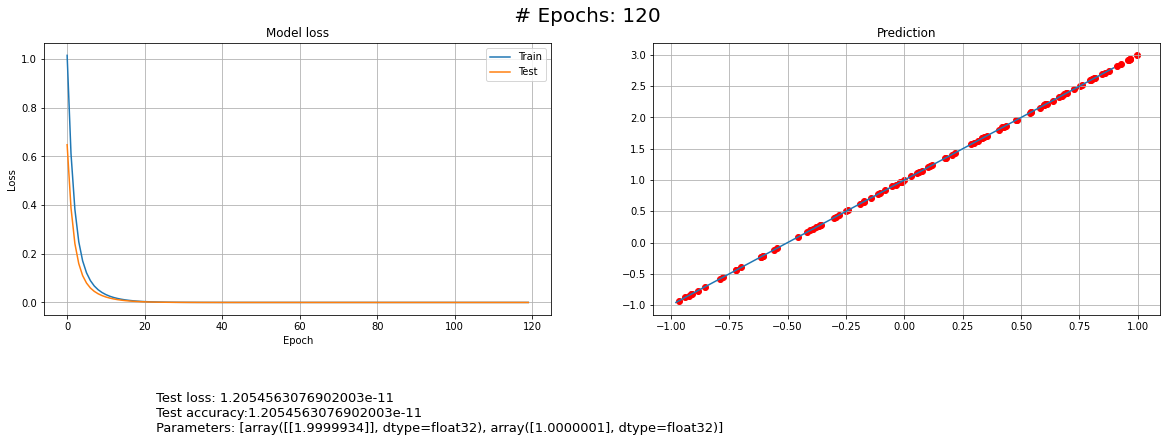

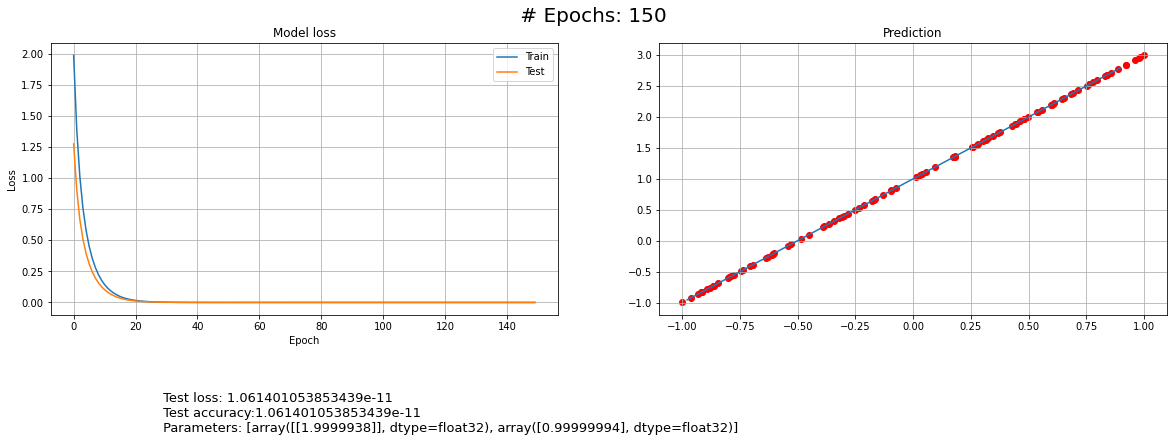

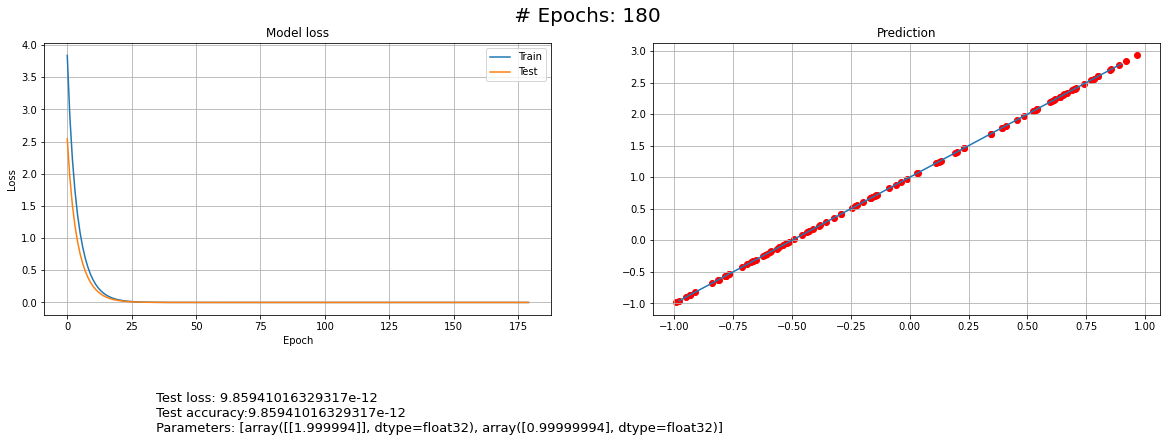

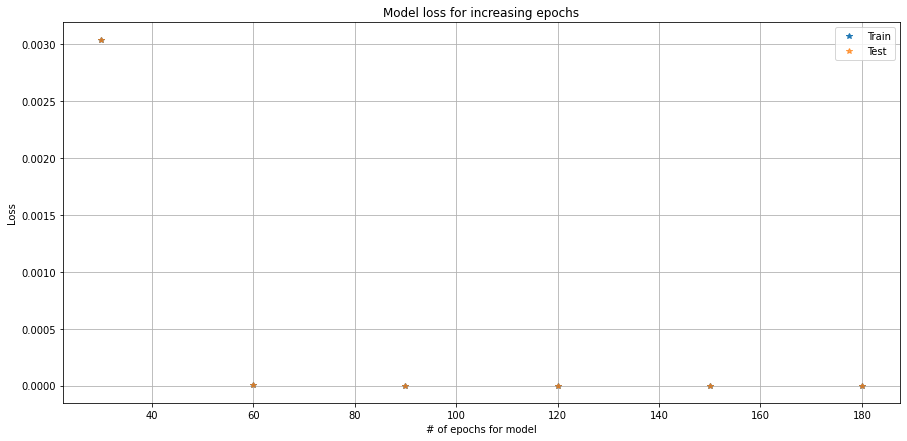

In [ ]:
train_loss=[]
test_loss =[]

epoch =[]
for i in range(6):
  score = Do_model_epochs(i)
  train_loss.append(score[0])
  test_loss.append(score[1])
  epoch.append(step_epoch*(i+1) )

fig= plt.figure(figsize = (15,7))
plt.plot(epoch,train_loss, "*", label= "Train")
plt.plot(epoch,test_loss, "*", label= "Test", alpha = 0.7)
plt.title("Model loss for increasing epochs")
plt.xlabel("# of epochs for model")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

By increasing the epochs we see that the test_loss decreases quickly up to 60 epochs and at 90 loss has a factor of $10^{-9}$

We could try to see how the loss function behaves by increasing N_train and always starting with 30 epochs

## Experimenting on: $N_{\mathrm{train}}$

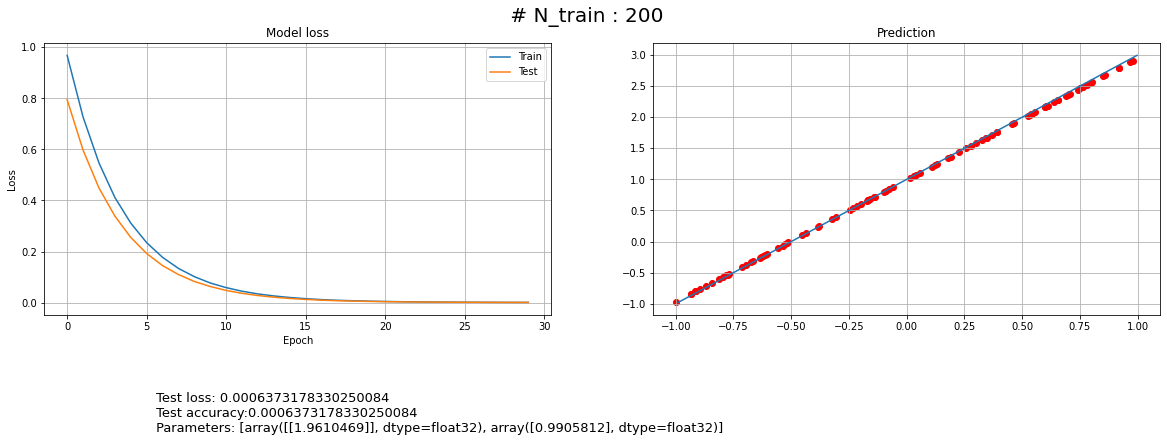

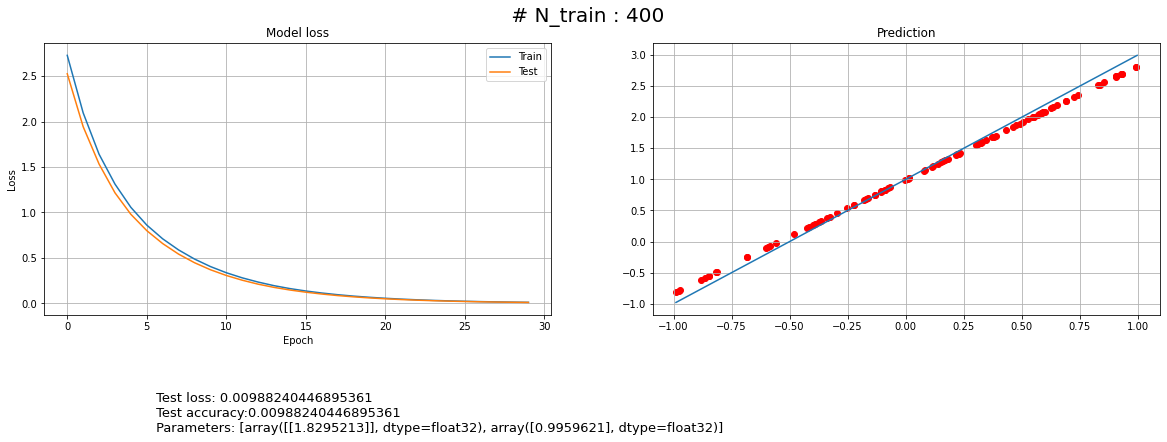

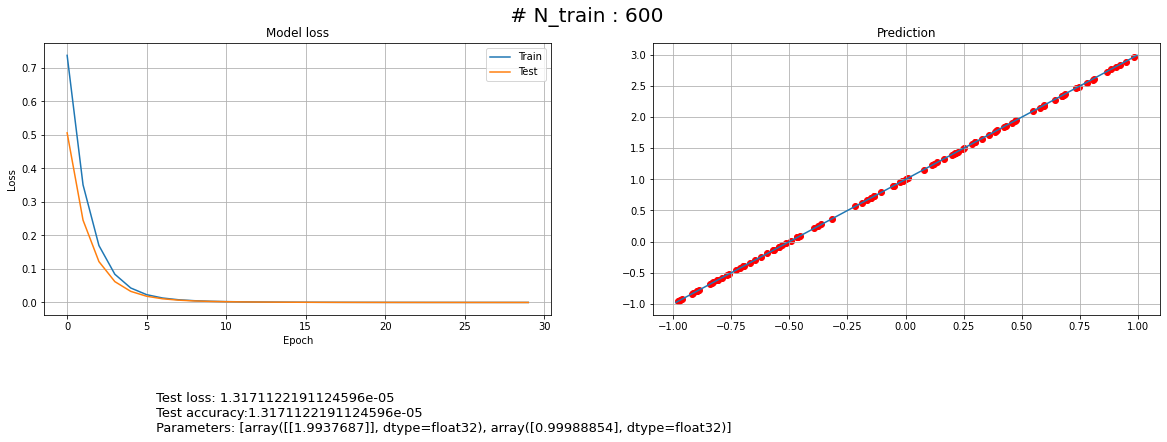

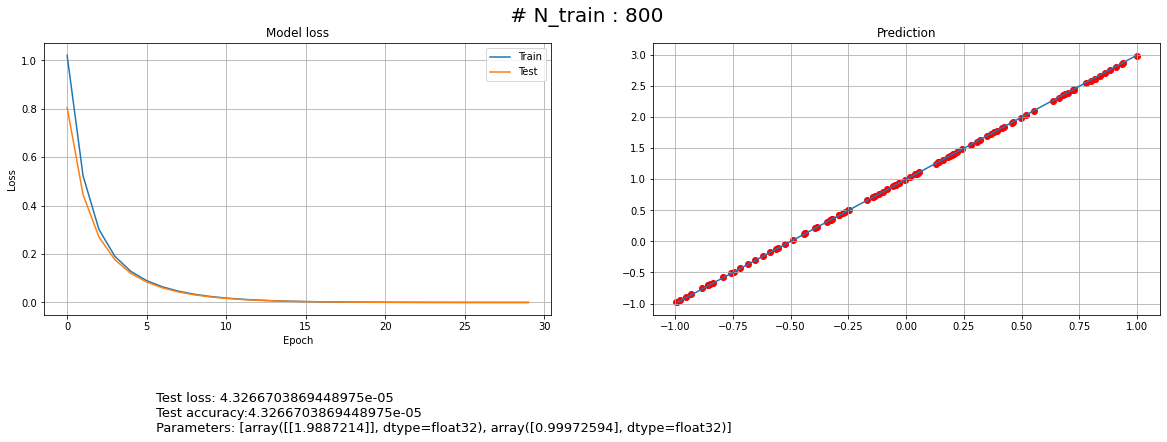

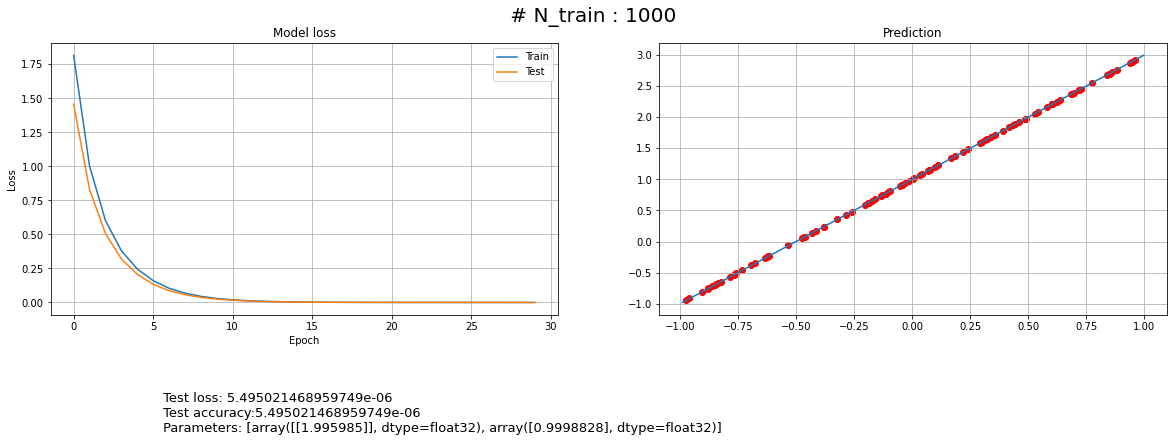

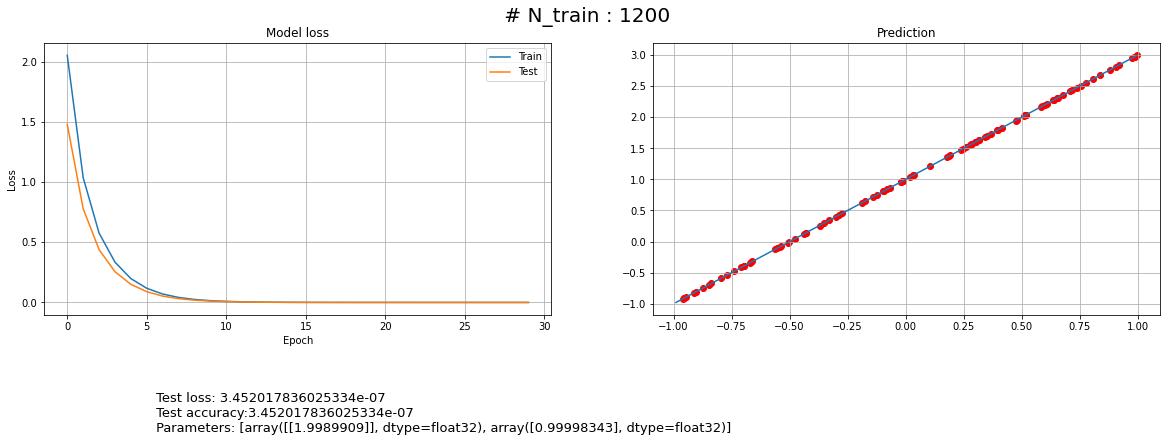

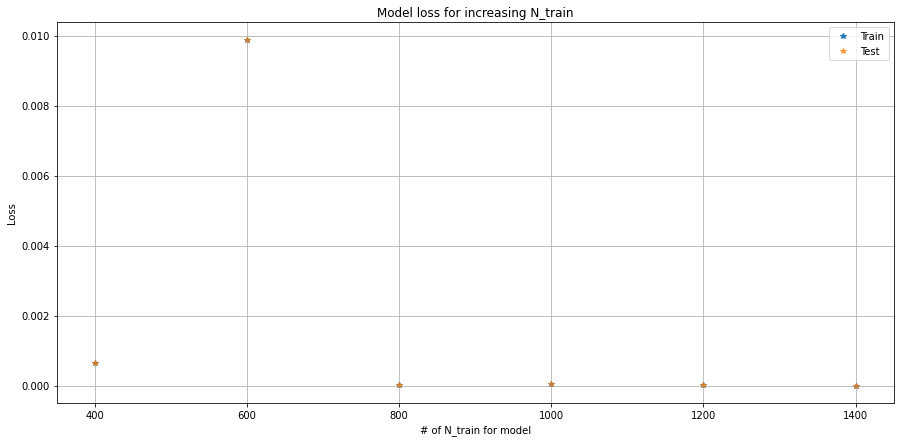

In [ ]:
train_loss=[]
test_loss =[]
N_train =[]

ep = 30

for i in range(6):
  score = Do_model_N_train(i,ep)
  train_loss.append(score[0])
  test_loss.append(score[1])
  N_train.append(N_train0 + N_train_step*(i+1) )

fig= plt.figure(figsize = (15,7))
plt.plot(N_train,train_loss, "*", label= "Train")
plt.plot(N_train,test_loss, "*", label= "Test", alpha = 0.7)
plt.title("Model loss for increasing N_train")
plt.xlabel("# of N_train for model")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

Here we see that our model is less perfomant with $N_{\mathrm{train}} = 600 $ for 30 epochs. Does this mean that increasing the number of data to train is not necessarily good?
In the next section we will try to explore this behavior better.


## Experimenting on : $\sigma$
Let's try "disturbing" the data a bit by introducing Gaussian noise and see if our model only gets worse or if it can produce better results.

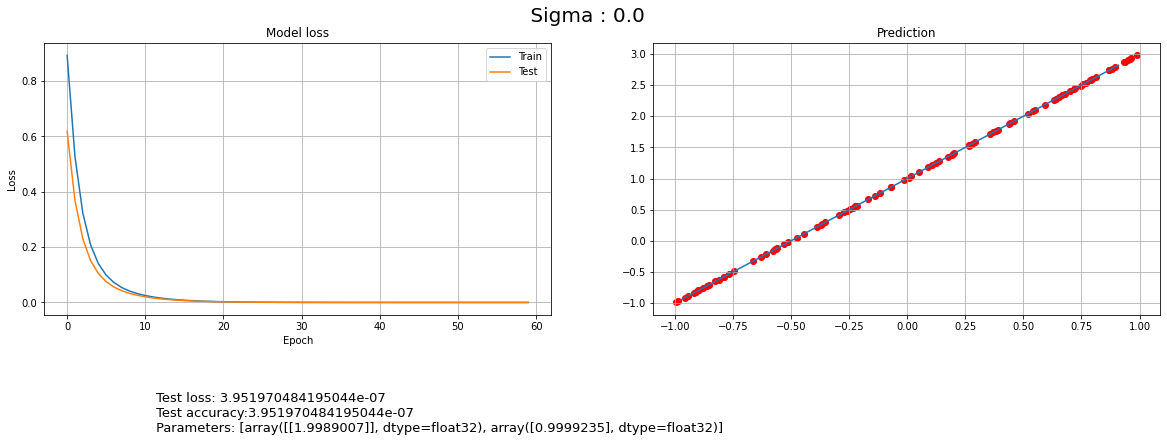

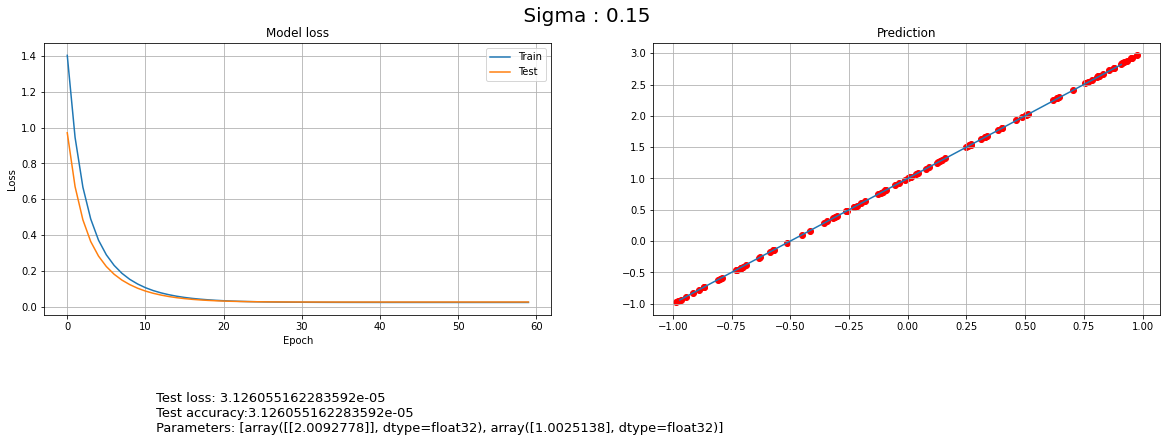

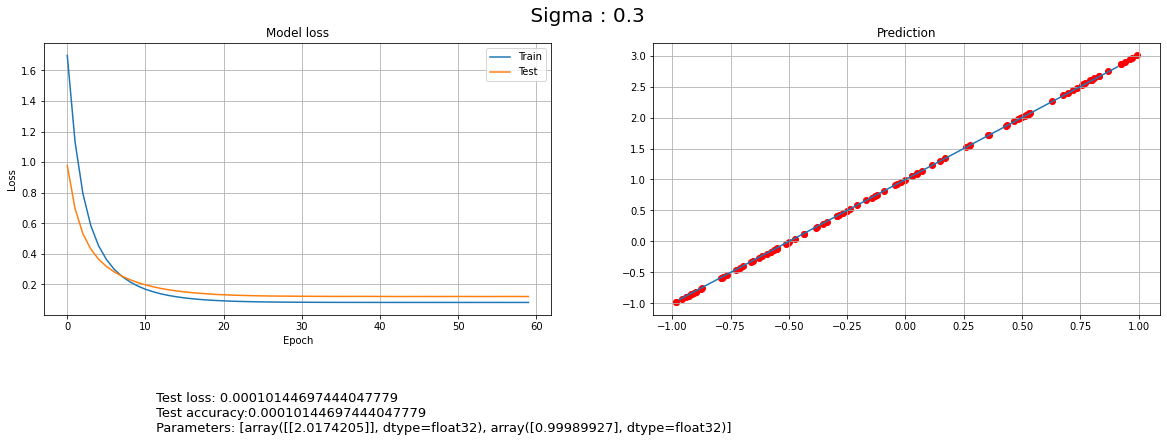

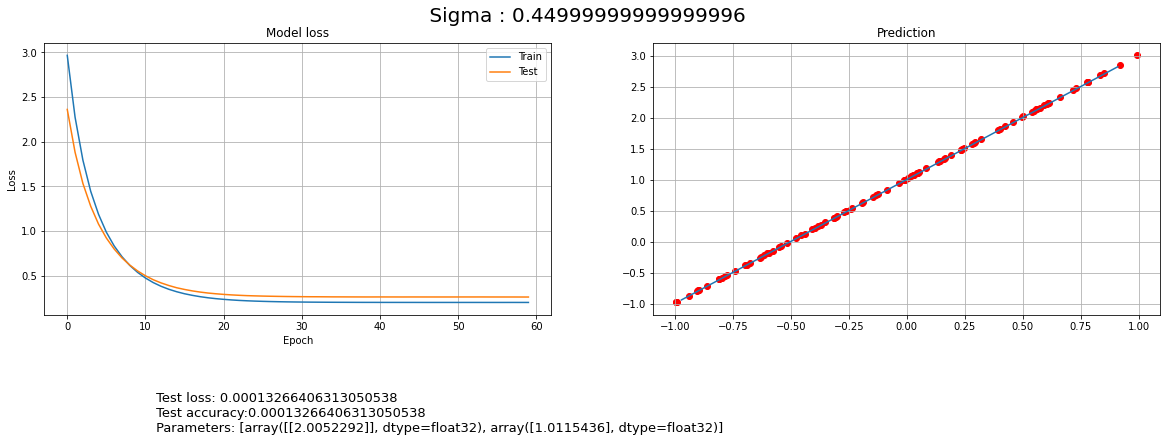

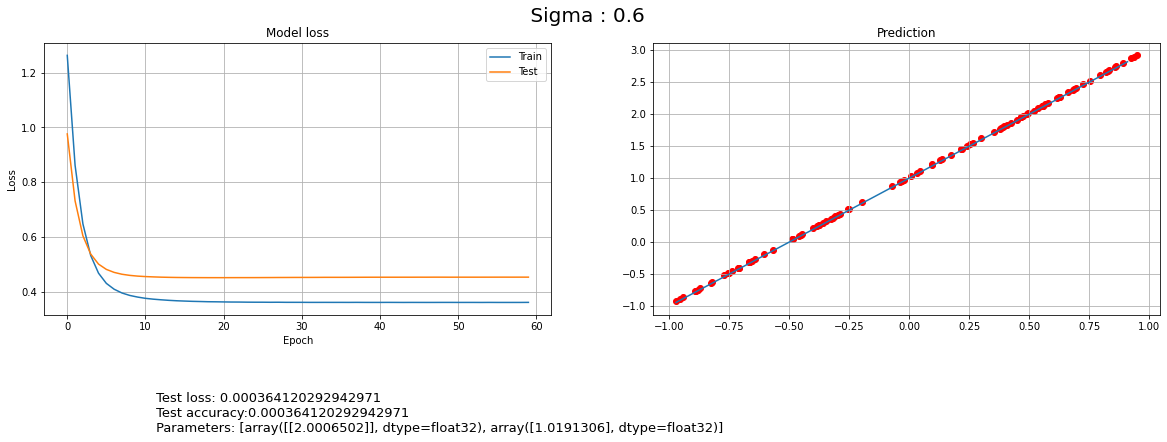

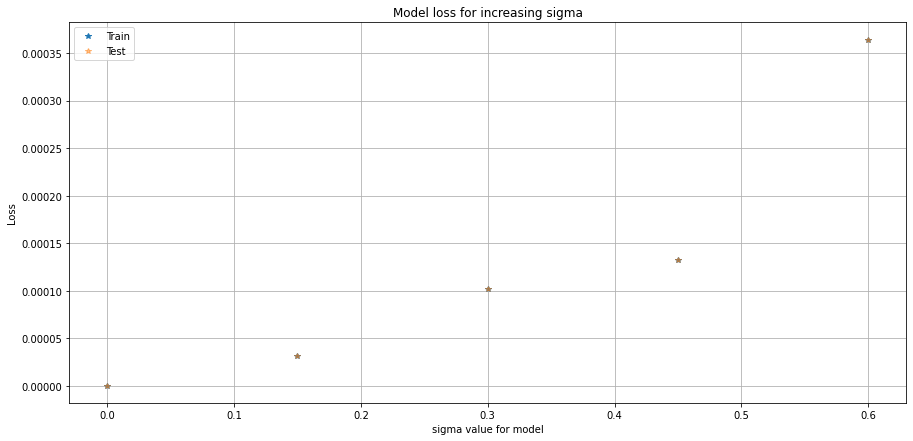

In [ ]:
train_loss=[]
test_loss =[]
sigma =[]
for i in range(5):
  score = Do_model_sigma(i)
  train_loss.append(score[0])
  test_loss.append(score[1])
  sigma.append(sigma_step*(i) )

fig= plt.figure(figsize = (15,7))
plt.plot(sigma,train_loss, "*", label= "Train")
plt.plot(sigma,test_loss, "*", label= "Test", alpha = 0.7)
plt.title("Model loss for increasing sigma")
plt.xlabel("sigma value for model")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()

For the model and configuration we are using varying sigma does not seem to provide any benefit: we can see an increasing of the loss function, but the fit graph shows no particular changes.

## How the system behaves as a function of epoch and $N_{\mathrm{train}}$?
Let us check whether the doubt we had in modifying $N_{\mathrm{train}}$ is correct:

In [ ]:
sigma = 0.1
def Do_model_N_train_epoch(n_itr,iep):

  fig = plt.figure(figsize = (15,9) )

  ep = step_epoch*(iep+1)
  fig.suptitle( " epochs = "+str(ep) , fontsize = 20)

  for itr in range(n_itr):
    N_train = N_train0 + N_train_step*itr
    x_train = np.random.uniform(-1, 1, N_train)
    y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
   

    model = tf.keras.Sequential()
    model.add(Dense(1, input_shape=(1,)))
    model.compile(optimizer='sgd', loss='mse', metrics=['mse']) # compile the model choosing optimizer, loss and metrics objects  
    history = model.fit(x=x_train, y=y_train, 
            batch_size=32, epochs=ep,
            shuffle=True, # a good idea is to shuffle input before at each epoch
            validation_data=(x_valid, y_valid),
            verbose = 0)
    
   # score = model.evaluate(x_valid, y_target, batch_size=32, verbose=0)
    plt.plot(history.history['loss'], label = "N_train: "+ str(N_train))
    #plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.grid(True)
  plt.legend( loc='best')

  #fig.text(0.2,-0.2, ' Test loss: '+ str(score[0]) +
   # '\n Test accuracy:' + str( score[1]) +
   # '\n Parameters: ' + str( model.get_weights() ) , fontsize =13)
  fig.show()

  return 

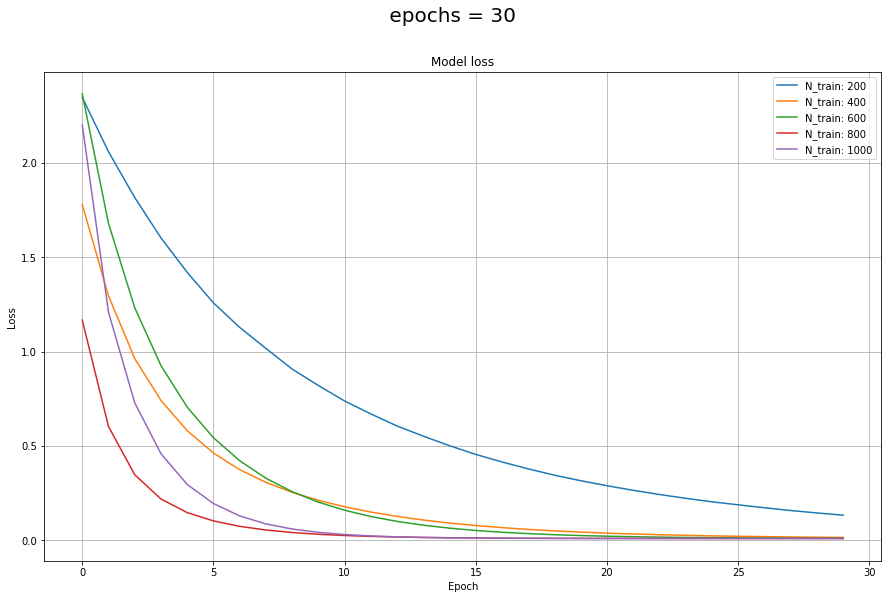

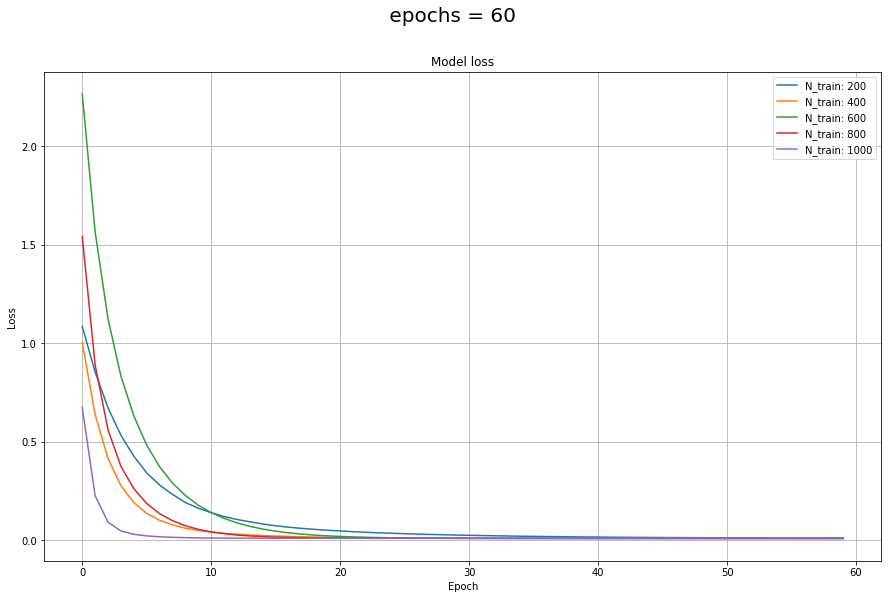

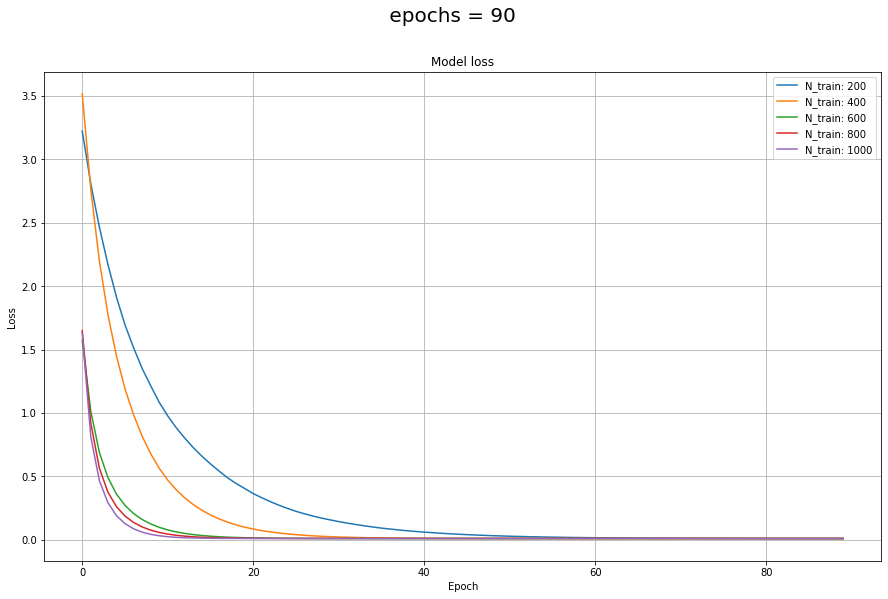

In [ ]:
for iep in range(3):
  Do_model_N_train_epoch(5,iep)

From the graphs above we can see that indeed a larger number of $N_{\mathrm{train}}$ for a given number of epochs may not be the best choice.

## <span style="color:green">Exercise 11.2 Linear fit</span>

We now try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

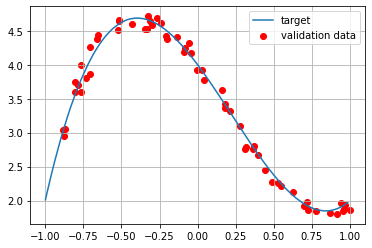

In [ ]:
# target parameters of f(x) = a*x^3 + b*x^2 + c*x +d
a = 3
b =-2
c =-3
d = 4
import numpy as np

def f(x):
  return a*x**3 + b*x**2 + c*x + d 

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 600)
x_valid = np.random.uniform(-1, 1, 60)
x_valid.sort()
x_test = np.random.uniform(-1, 1, 200)  # to fit complete function in [-1,1]
x_test.sort()
y_target =  f(x_test) # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_test, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

As before, we define some functions to more easily experiment with the different possibilities.


In [ ]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

my_act    ='relu'  #activation function
my_opt    ='sgd'   # optimizer
my_loss   = 'mse'  # loss function
my_metric = 'mse'  # metric

def Prepare_model(N_layer,N_neurons):
  model = tf.keras.Sequential()
  model.add( Dense(N_neurons, activation = my_act , input_shape=(1,)) )
  for i in range(N_layer):
     model.add( Dense(N_neurons, activation = my_act ) )
  model.add(Dense(1, activation=my_act))
  model.compile( optimizer= my_opt,loss= my_loss, metrics=[my_metric])

  return model


In [ ]:
def Print_model(N_layers, N_neurons):

  for l in N_layers:
    for n in N_neurons:
      model = Prepare_model(l,n)
      history = model.fit(x=x_train, y=y_train, 
                batch_size=32, epochs=90,
                shuffle=True, 
                validation_data=(x_valid, y_valid),
                verbose = 0)
      
      plt.figure(figsize = (20,6))
      plt.subplot(1, 3, 1)
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title("$N_{layers}$ = "+str(l)+", $N_{neurons}$ = "+str(n))
      plt.ylabel('loss')
      plt.xlabel('Epoch')
      plt.legend(['Train', 'Test'], loc='best')
      plt.grid(True)

      plt.subplot(1, 3, 2)
      x_predicted = np.random.uniform(-1, 1, 100)
      y_predicted = model.predict(x_predicted)
      plt.scatter(x_predicted, y_predicted,color='r', s=10, label="Prediction")
      plt.plot(x_test, y_target, label="Target function")
      plt.title("Prediction")
      plt.ylabel('y')
      plt.xlabel('x')
      plt.xlim(-1,1)
      plt.grid(True)
      plt.legend()

      plt.subplot (1,3,3)

      x_predicted_outbonds = np.random.uniform(-2, 2, 100)
      x_test_outbonds = np.random.uniform(-2, 2, 100)
      y_predicted_outbonds = model.predict(x_predicted_outbonds)
      x_test_outbonds.sort() #sorting to plot target function
      y_target_outbonds = f(x_test_outbonds)

      plt.scatter(x_predicted_outbonds, y_predicted_outbonds,color='r', s=10, label="Prediction")
      plt.plot(x_test_outbonds, y_target_outbonds, label="Target function")
      plt.title("Prediction outside the training")
      plt.axvline(x=-1,color='black',linewidth=0.8)
      plt.axvline(x=1,color='black',linewidth=0.8)
      plt.ylabel('y')
      plt.xlabel('x')
      
      plt.grid(True)
      plt.legend()


    plt.show()

  return

### Relu activation function 
Let's try changing the number of layers and the number of neurons per layer in our network using the "relu" activation function.

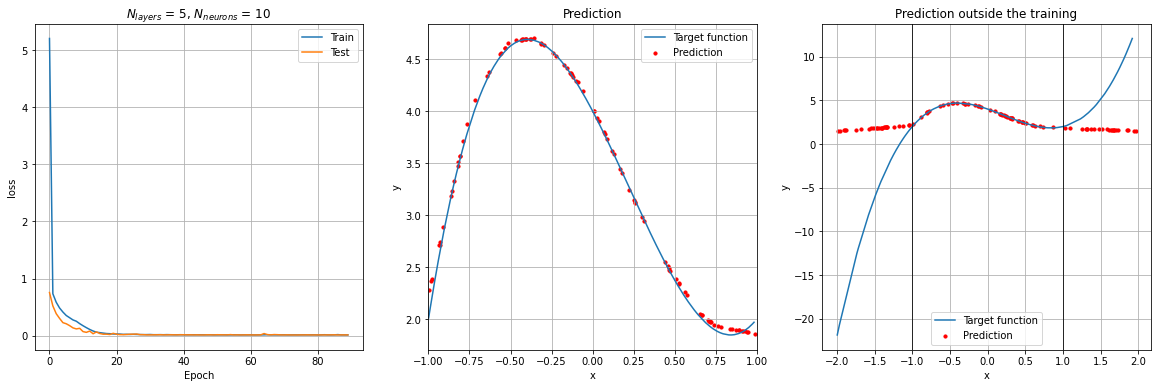

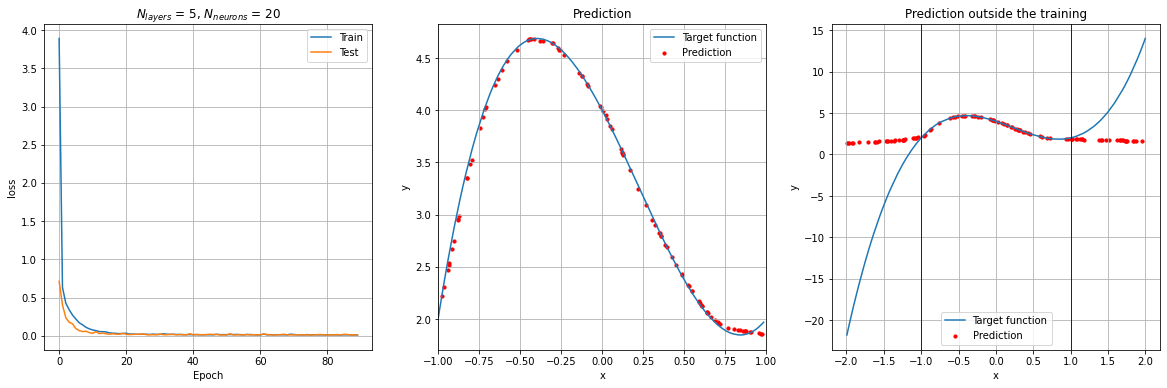

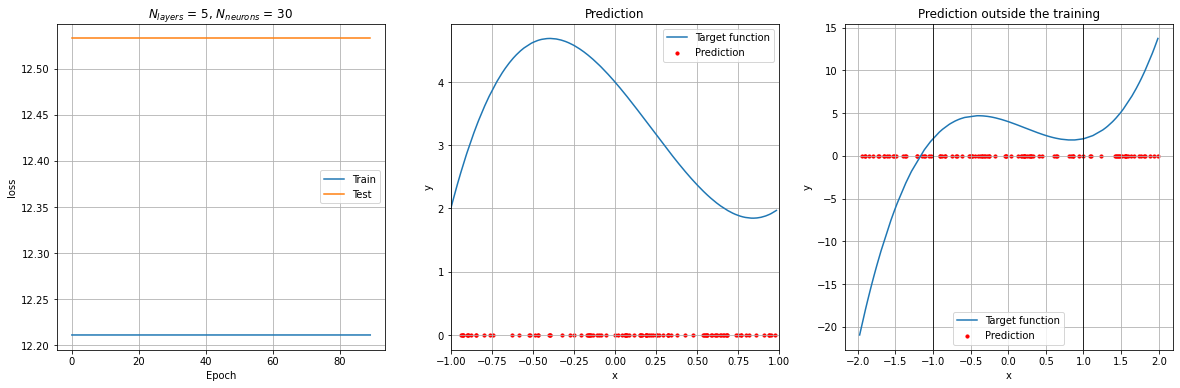

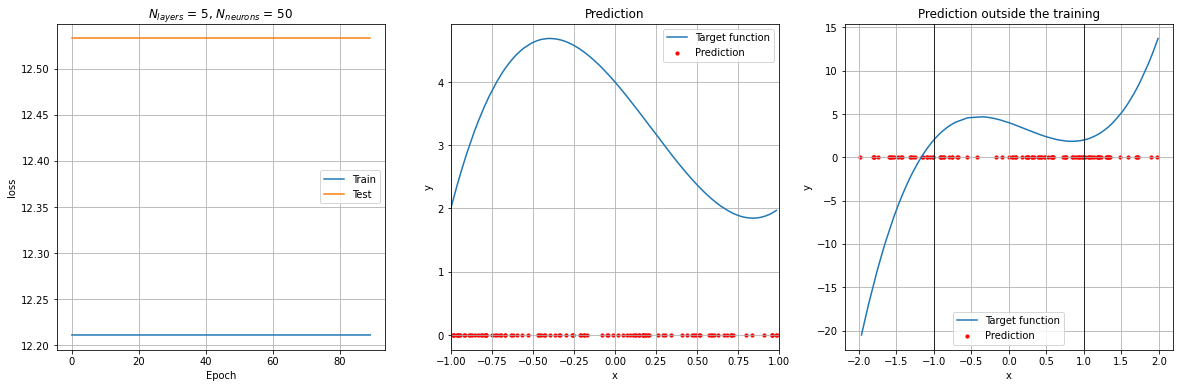

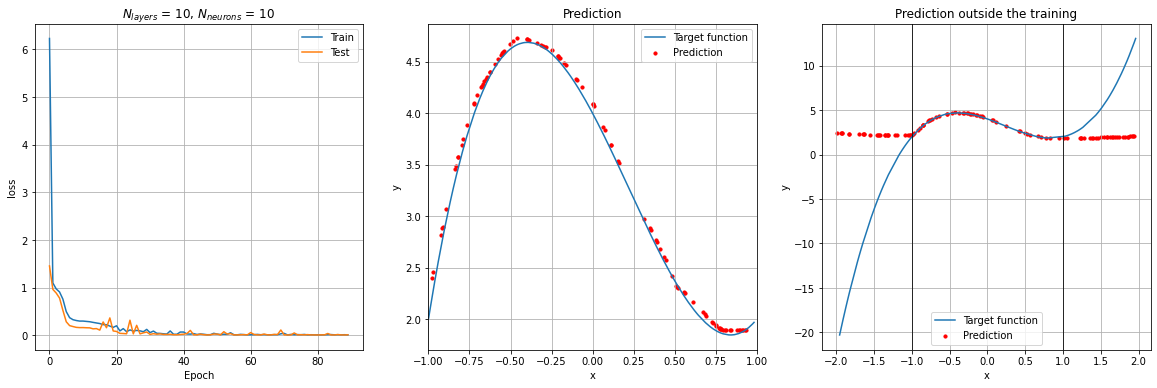

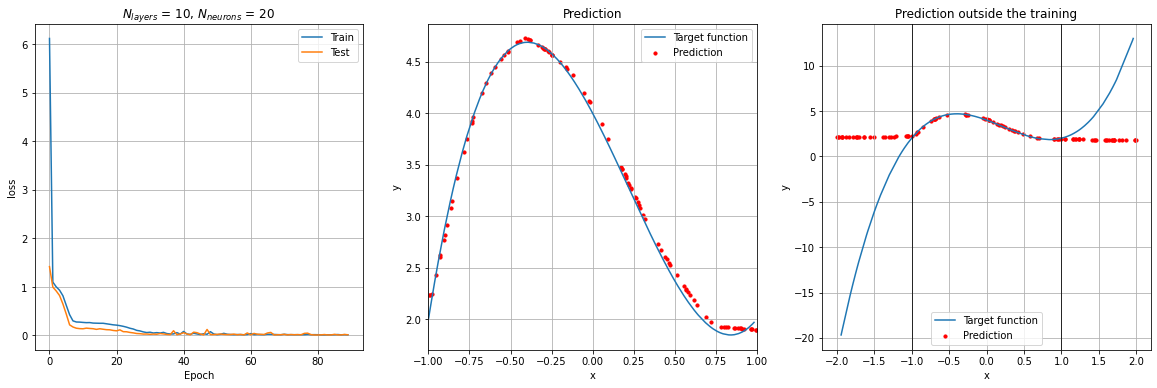

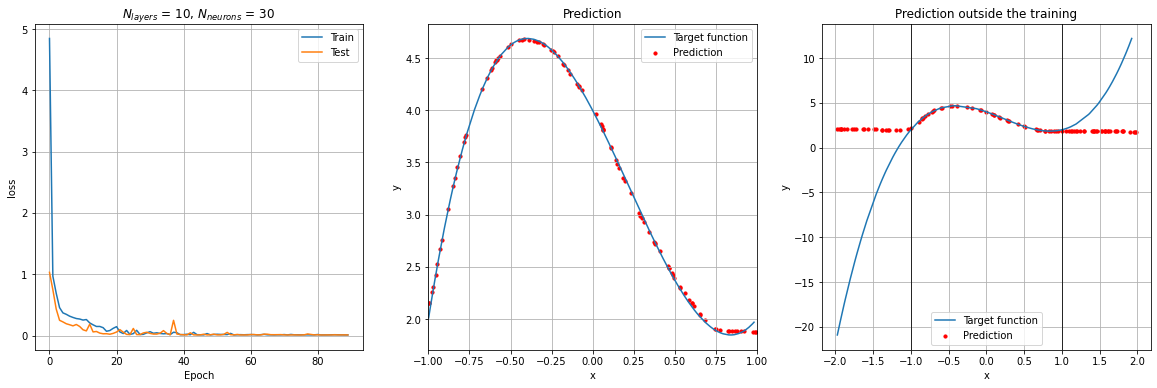

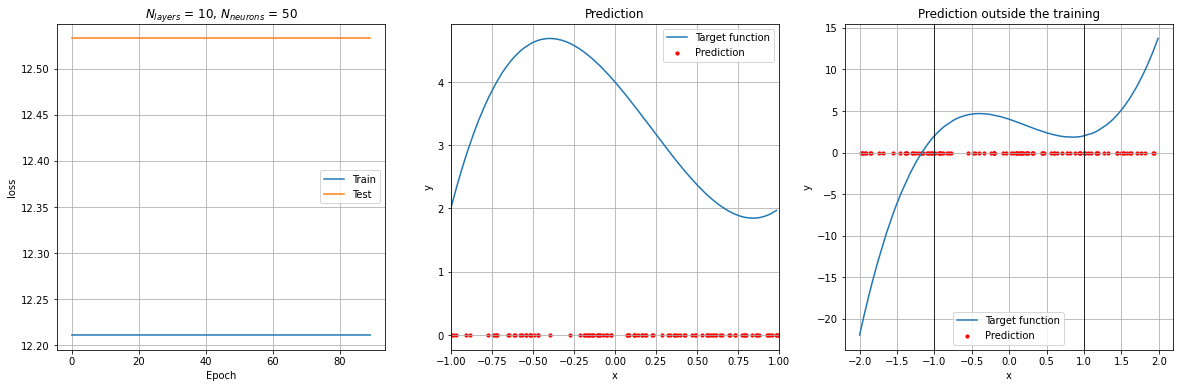

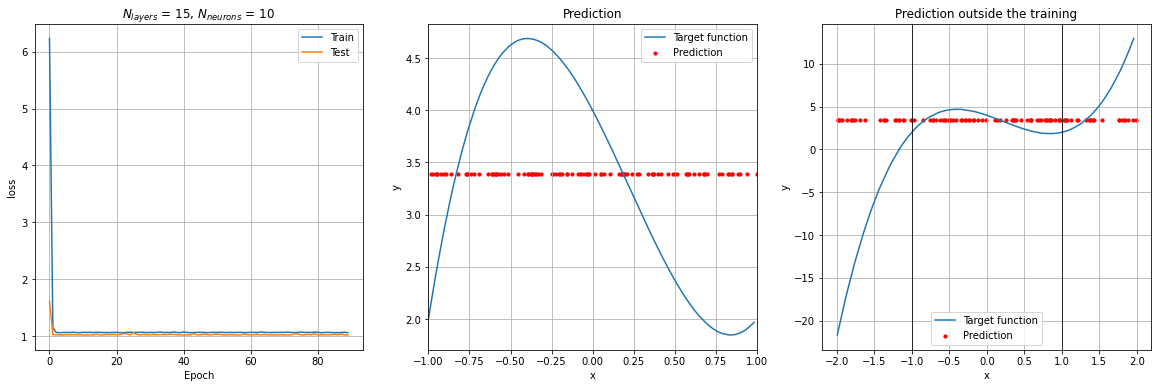

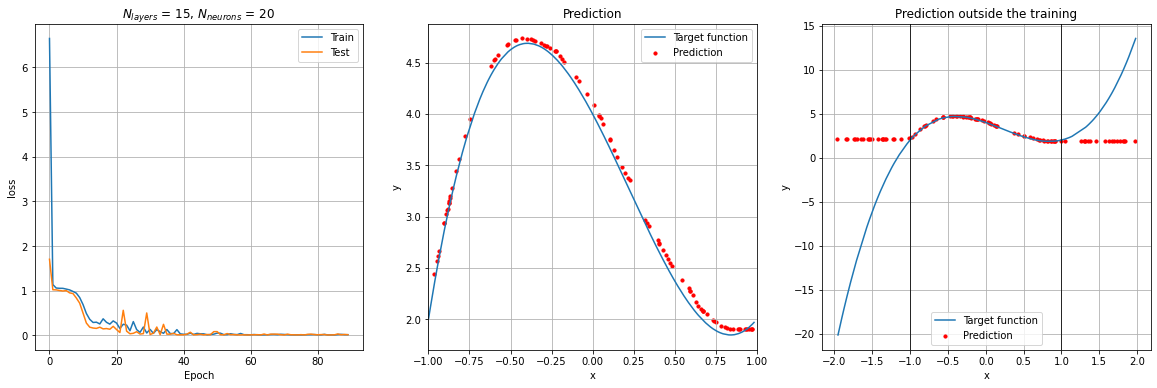

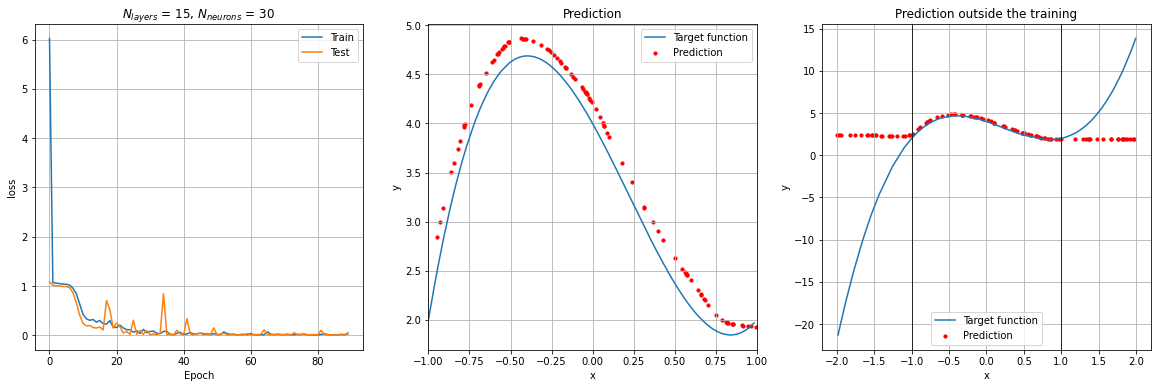

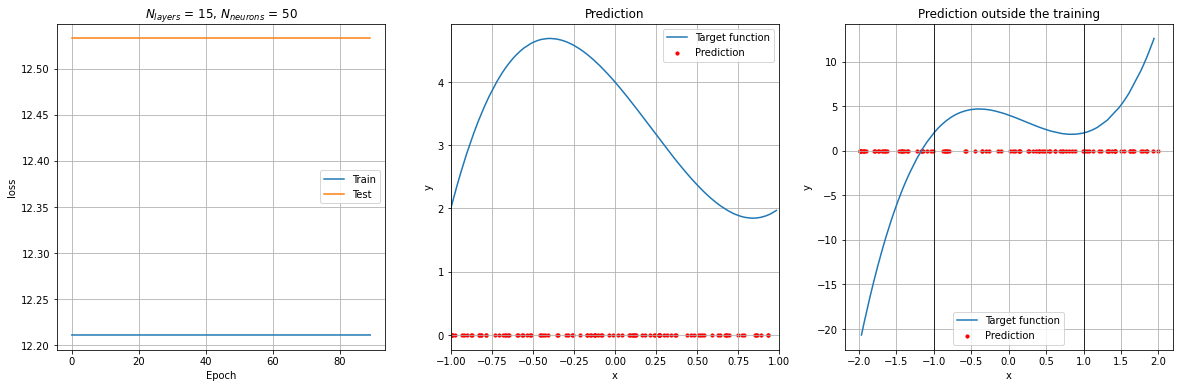

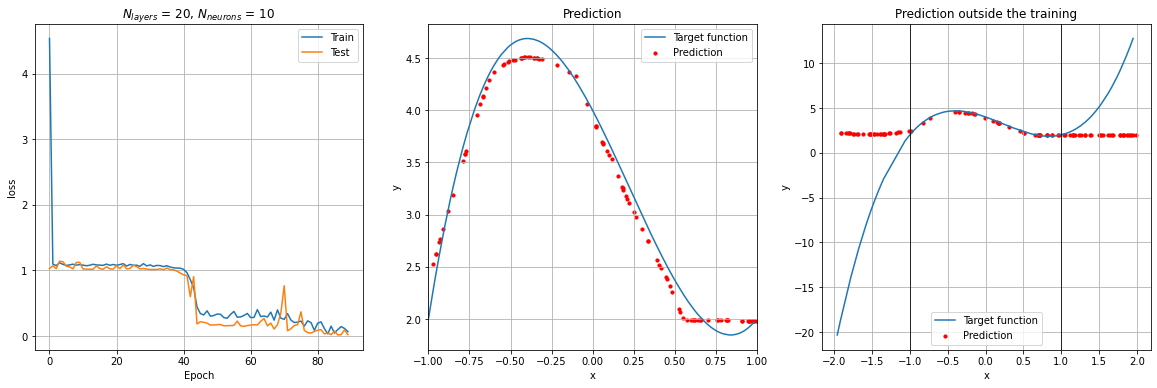

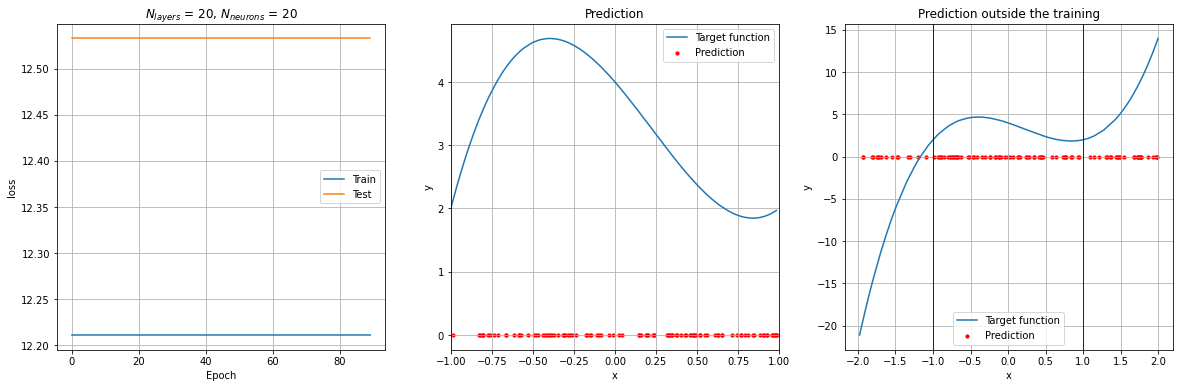

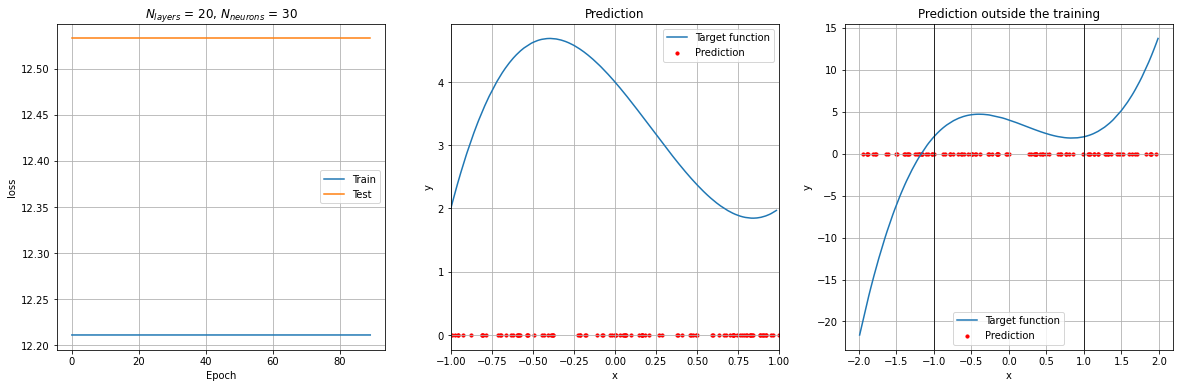

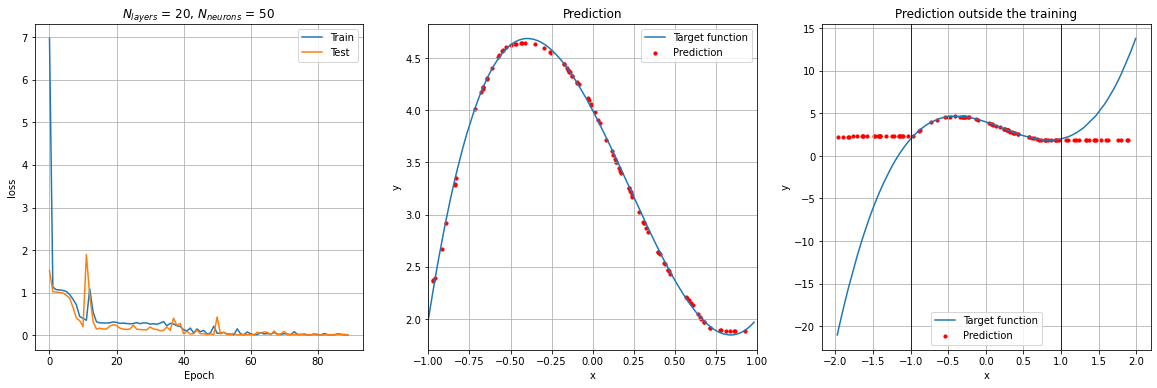

In [ ]:
N_layers = [5,10,15,20]
N_neurons = [10,20,30,50]

my_act    ='relu'  #activation function
my_opt    ='sgd'   # optimizer
my_loss   = 'mse'  # loss function
my_metric = 'mse'  # metric

Print_model(N_layers,N_neurons)

We find some combinations of layer and neuron per layer that fit the network inside the train data ( x in [-1,1]) quite well, while there is no combination that can fit the data outside the training area.

### Elu activation function
We try to use the "elu" activation function proceeding in the same way as before for the "relu"

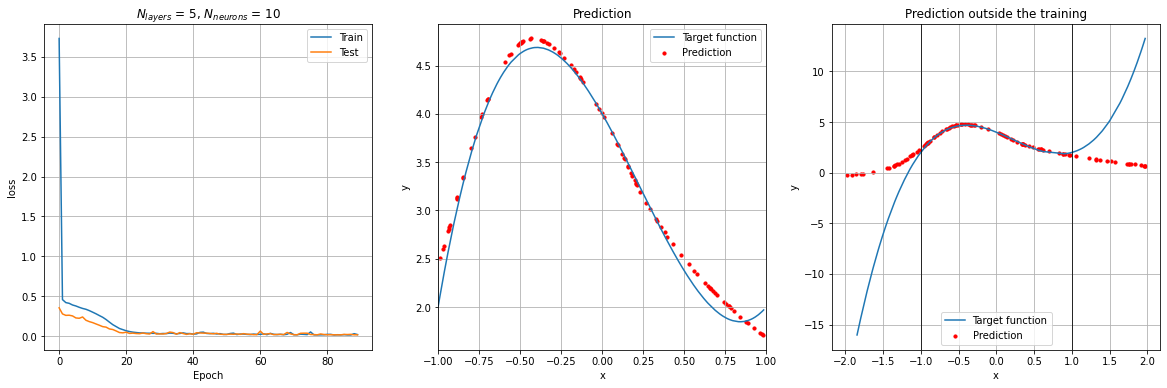

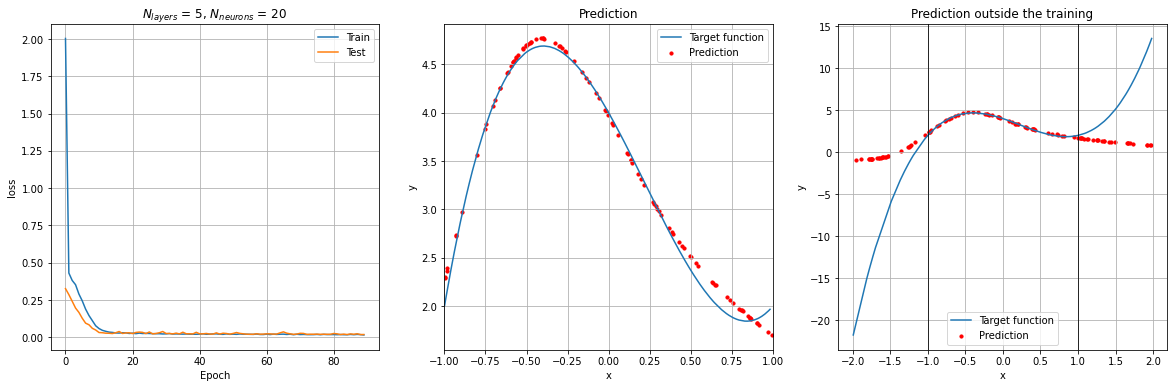

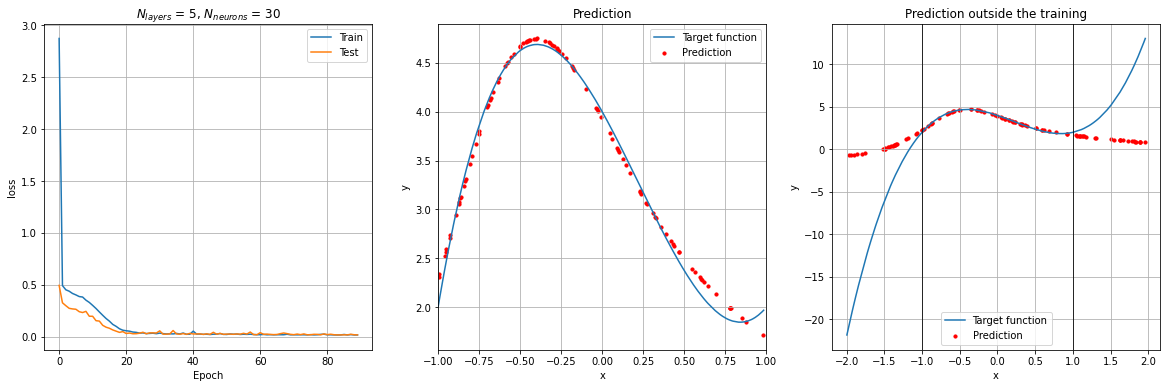

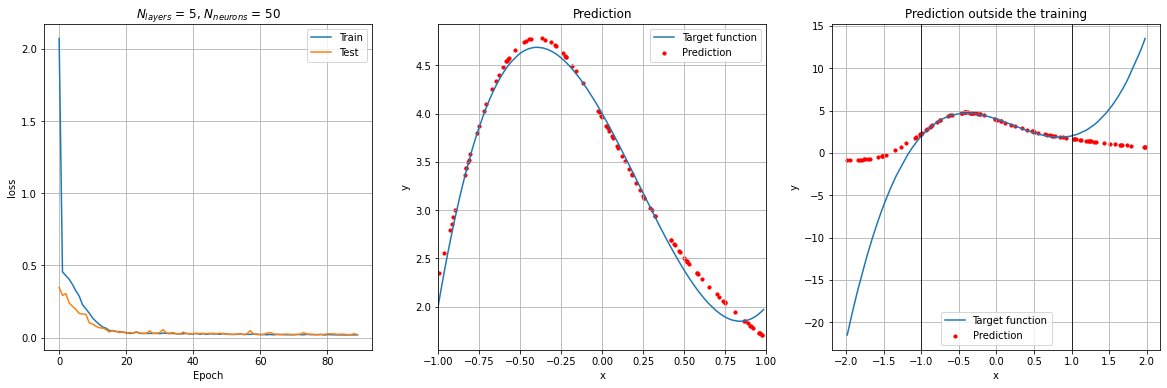

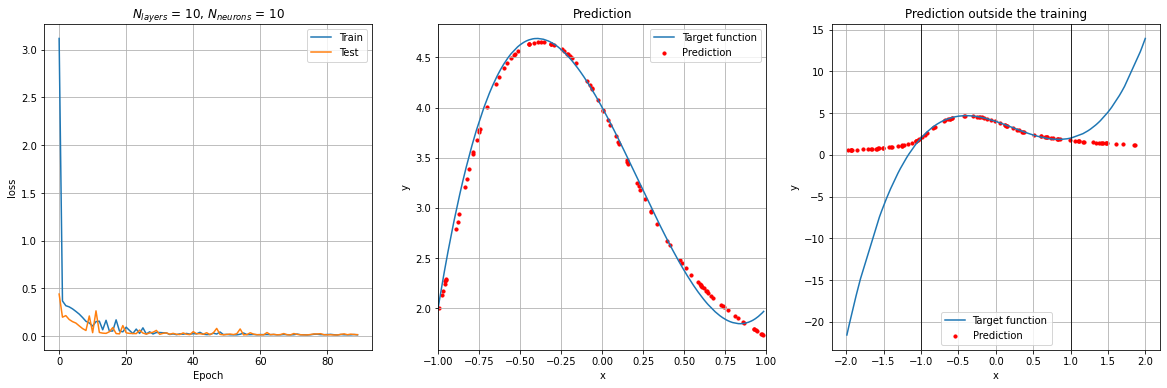

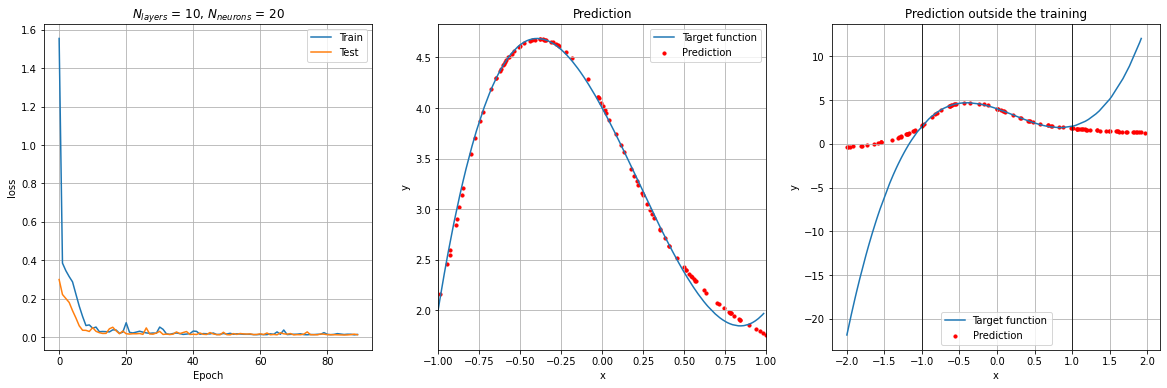

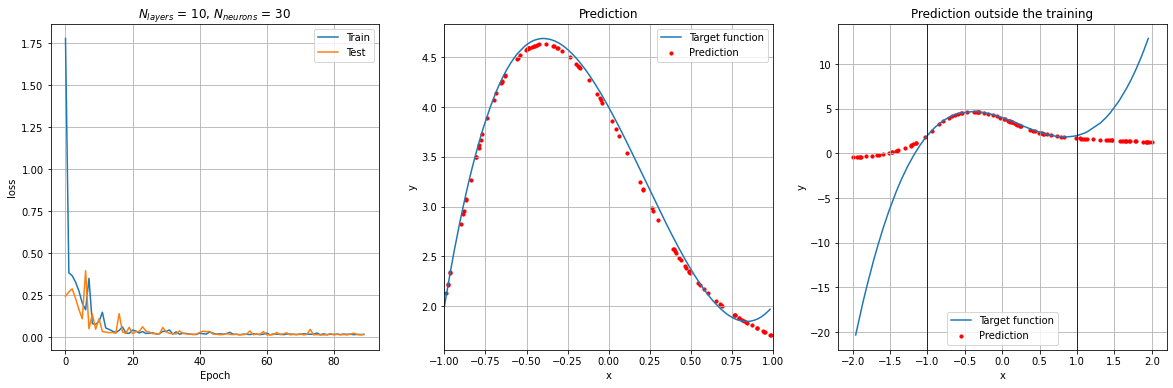

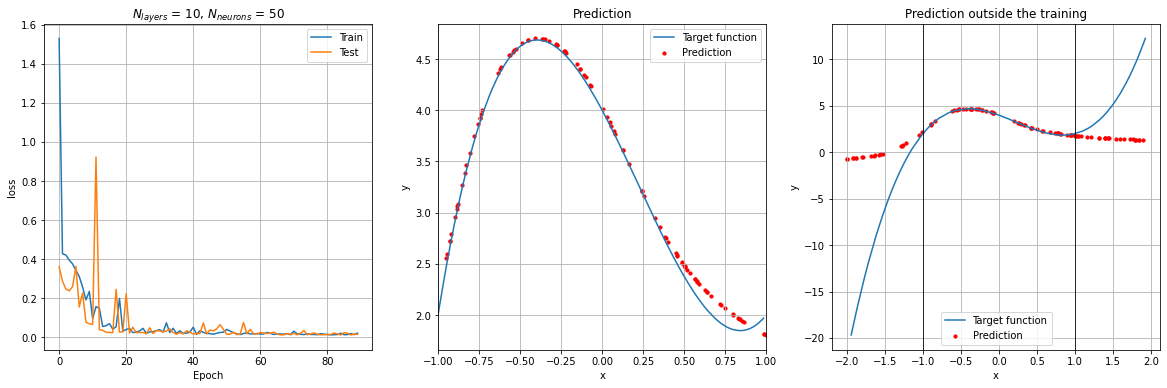

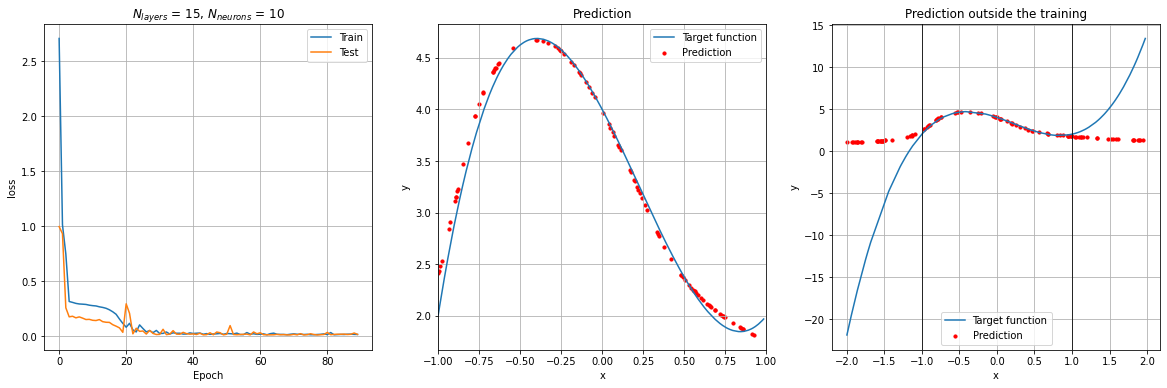

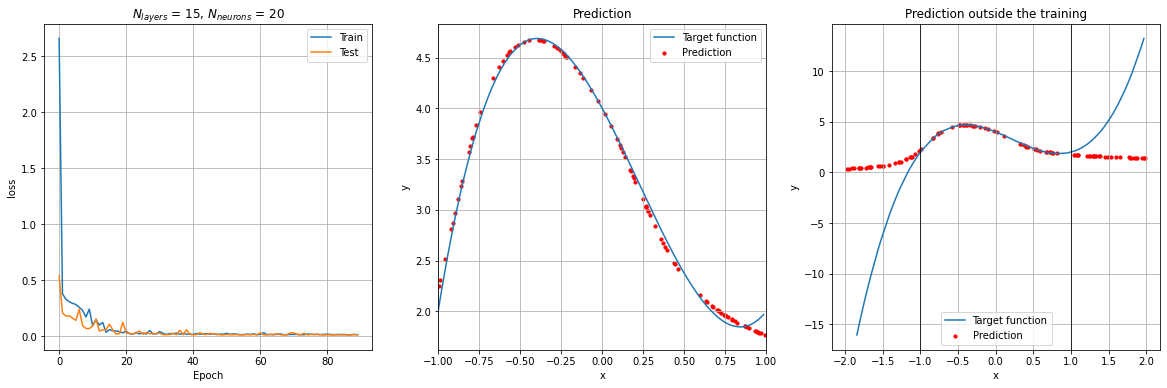

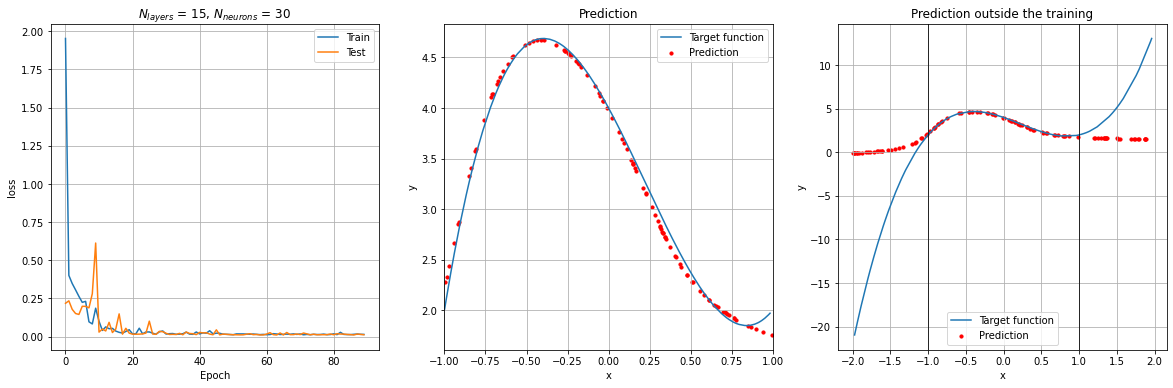

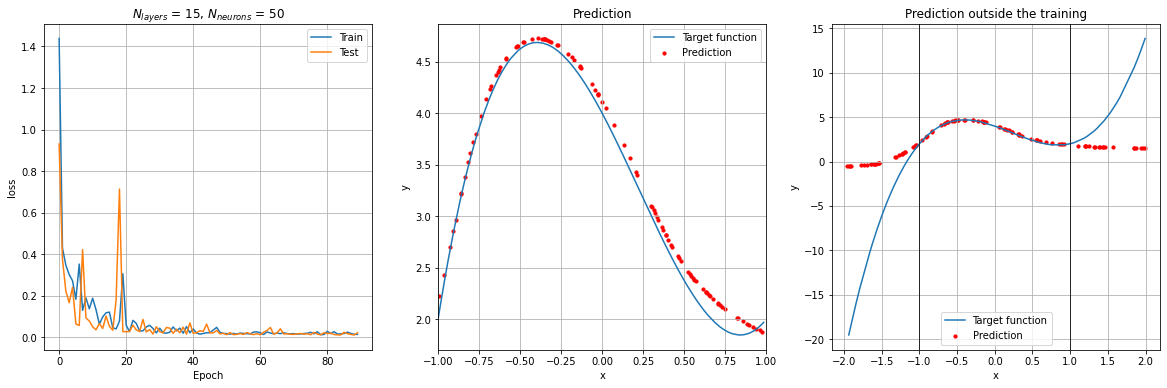

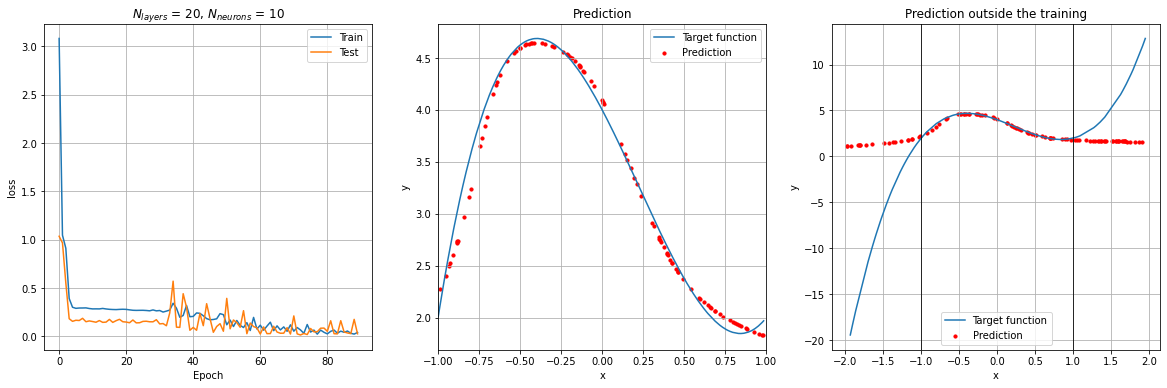

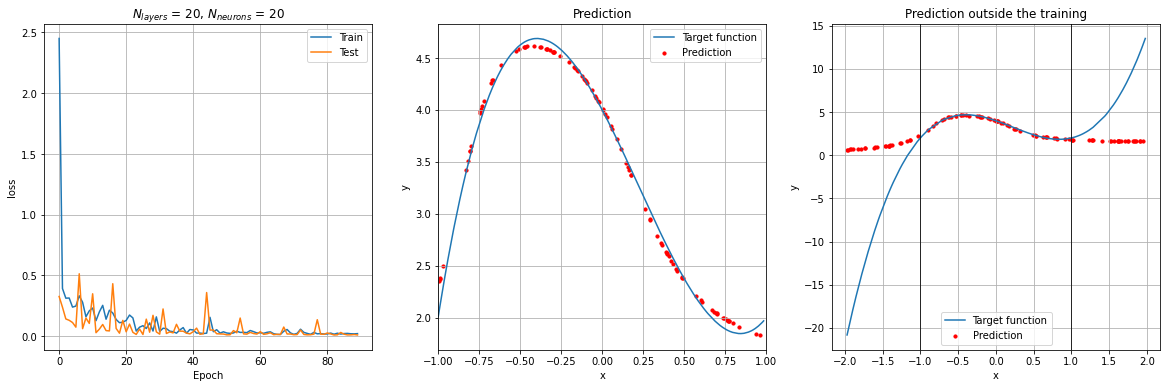

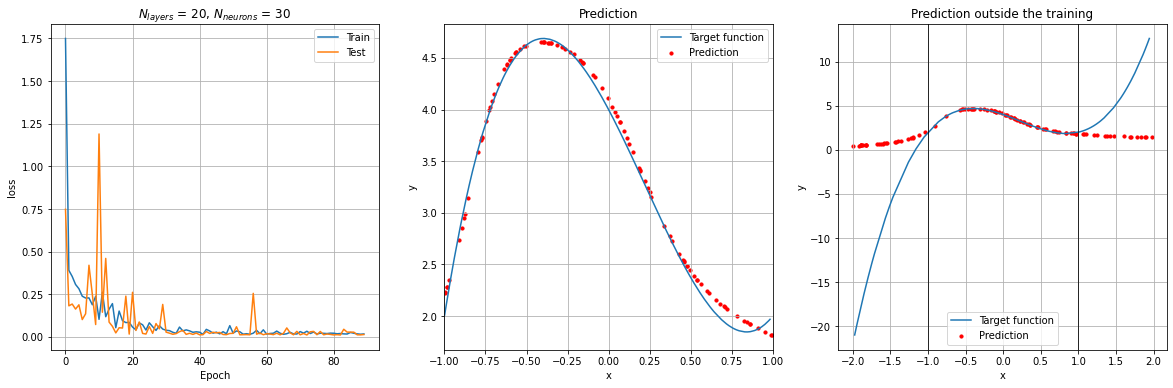

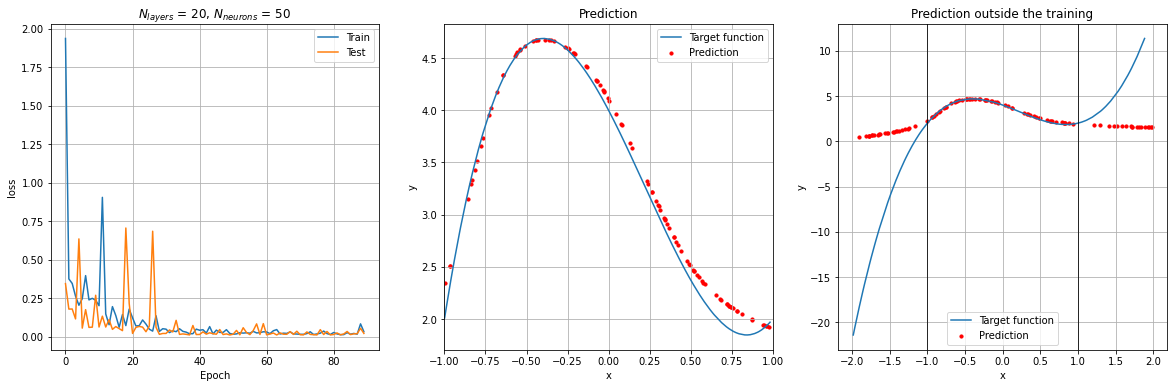

In [ ]:
N_layers = [5,10,15,20]
N_neurons = [10,20,30,50]

my_act    ='elu'  #activation function
my_opt    ='sgd'   # optimizer
my_loss   = 'mse'  # loss function
my_metric = 'mse'  # metric

Print_model(N_layers,N_neurons)

We see that "elu" always succeeds in training a network ( there are no flat cases as with relu" ).
I have also tried using other functions such as "sigmoid" and "tanh", but without satisfactory results and that's why we do not report the graphs .

### Different number of neuron in each layer

We now try to use a different number of neurons in each layer and see if we can found a good NN.

In [ ]:
def model_different_layer(neur_sequence,starting_neur) :
  model = tf.keras.Sequential()
  model.add( Dense(starting_neur, activation = my_act , input_shape=(1,)) )
  for N_neurons in neur_sequence:
     model.add( Dense(N_neurons, activation = my_act ) )
  model.add(Dense(1, activation=my_act))
  model.compile( optimizer= my_opt,loss= my_loss, metrics=[my_metric])

  history = model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=90,
              shuffle=True, 
              validation_data=(x_valid, y_valid),
              verbose = 0)
    
  plt.figure(figsize = (20,6))
  plt.subplot(1, 3, 1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("$N_{layers}$ = "+str(len(neur_sequence))+", $N_{neurons}$ = "+str(neur_sequence))
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='best')
  plt.grid(True)

  plt.subplot(1, 3, 2)
  x_predicted = np.random.uniform(-1, 1, 100)
  y_predicted = model.predict(x_predicted)
  plt.scatter(x_predicted, y_predicted,color='r', s=10, label="Prediction")
  plt.plot(x_test, y_target, label="Target function")
  plt.title("Prediction")
  plt.ylabel('y')
  plt.xlabel('x')
  plt.grid(True)
  plt.legend()

  plt.subplot (1,3,3)

  x_predicted_outbonds = np.random.uniform(-2, 2, 100)
  x_test_outbonds = np.random.uniform(-2, 2, 100)
  y_predicted_outbonds = model.predict(x_predicted_outbonds)
  x_test_outbonds.sort() #sorting to plot target function
  y_target_outbonds = f(x_test_outbonds)

  plt.scatter(x_predicted_outbonds, y_predicted_outbonds,color='r', s=10, label="Prediction")
  plt.plot(x_test_outbonds, y_target_outbonds, label="Target function")
  plt.title("Prediction outside the training")
  plt.axvline(x=-1,color='black',linewidth=0.8)
  plt.axvline(x=1,color='black',linewidth=0.8)
  plt.ylabel('y')
  plt.xlabel('x')

  plt.grid(True)
  plt.legend()

  plt.show()

  return



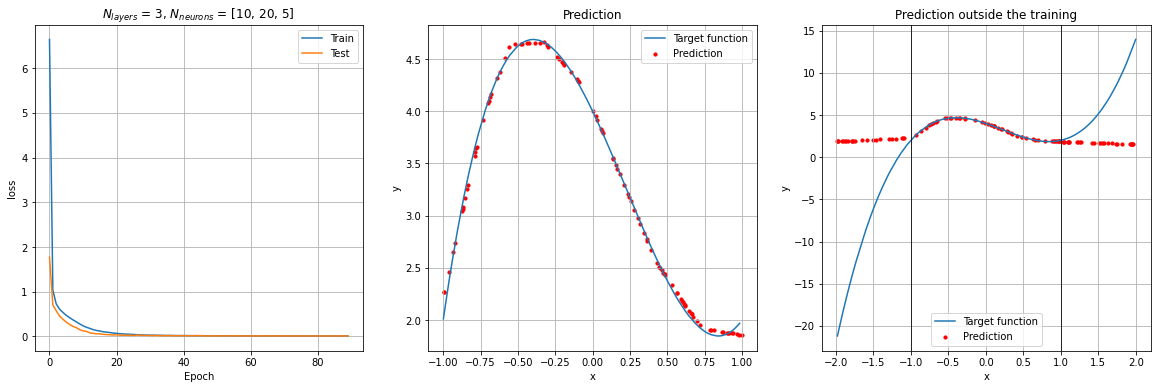

In [ ]:
Neur_sequence = [10,20,5]
starting_neur = 10
my_act ='relu'

model_different_layer( Neur_sequence, starting_neur)

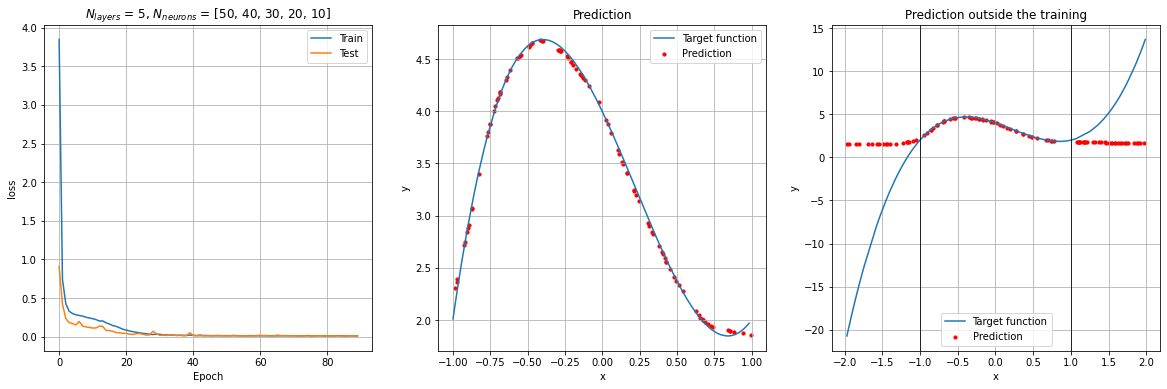

In [ ]:
Neur_sequence = [50,40,30,20,10]
starting_neur = 10
my_act ='relu'

model_different_layer( Neur_sequence, starting_neur)

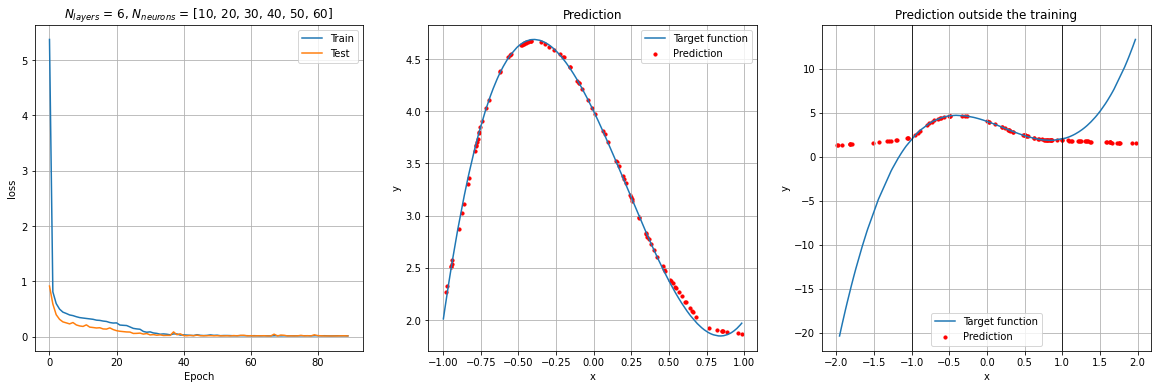

In [ ]:
Neur_sequence = [10,20,30,40,50,60]
starting_neur = 10
my_act ='relu'

model_different_layer( Neur_sequence, starting_neur)

The result are quite good, except for the rise of the function in the interval [0.8,1]. 
The fact that our network fails to fit that part could be due to the fact that we use stochastic gradient descend as optimizer. Let's try something new.

### Experimenting on: optimizer

Here I report some result of an experiment on the different optimizers.
It's easy to see that the choice of the optimizer can strongly affect the results. 

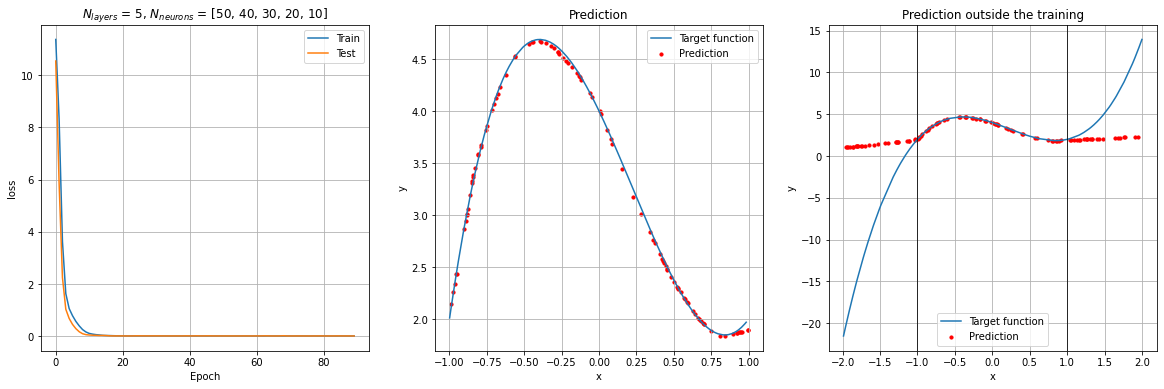

In [ ]:
Neur_sequence = [50,40,30,20,10]
starting_neur = 10
my_act ='relu'
my_opt = 'adam'

model_different_layer( Neur_sequence, starting_neur)

The Adam optimizer is pretty good: this net can fit very well the function inside the training zone. There is still no way to fit the function outside the training area.

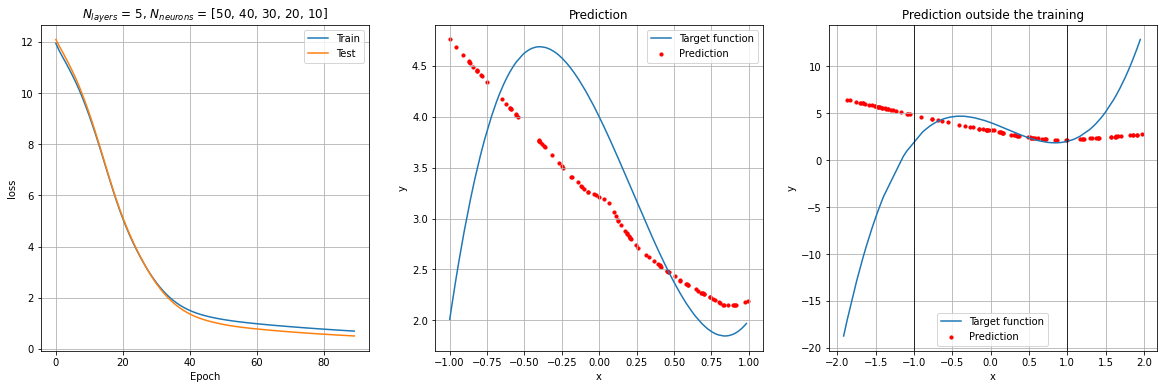

In [ ]:
Neur_sequence = [50,40,30,20,10]
starting_neur = 10
my_act ='relu'
my_opt = 'adagrad'

model_different_layer( Neur_sequence, starting_neur)

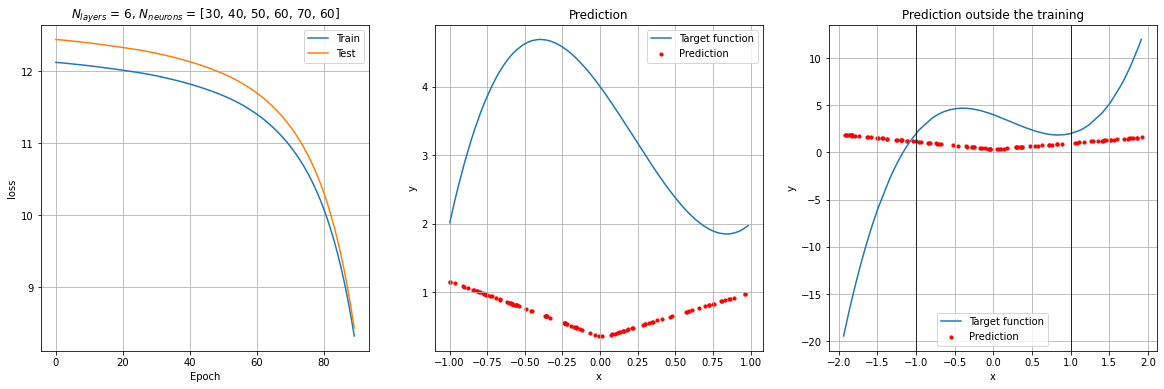

In [ ]:
Neur_sequence = [30,40,50,60,70,60]
starting_neur = 10
my_act ='relu'
my_opt = 'adadelta'

model_different_layer( Neur_sequence, starting_neur)

Adagrad and Adadelta don't work, as we can see both from the fit and the Loss function

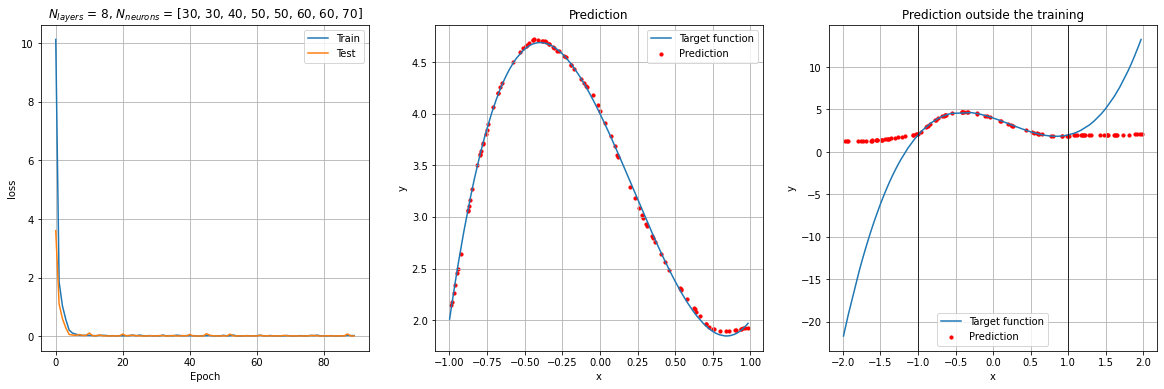

In [ ]:
Neur_sequence = [30,30,40,50,50,60,60,70]
starting_neur = 10
my_act ='relu'
my_opt = 'Nadam'

model_different_layer( Neur_sequence, starting_neur)

The Nadam optimizer with this configuration is the best model I've been able to produce.

### Experimenting on: Loss function

Finally, we try to change the "loss function " from "mean squared error" to "mean absolute error".

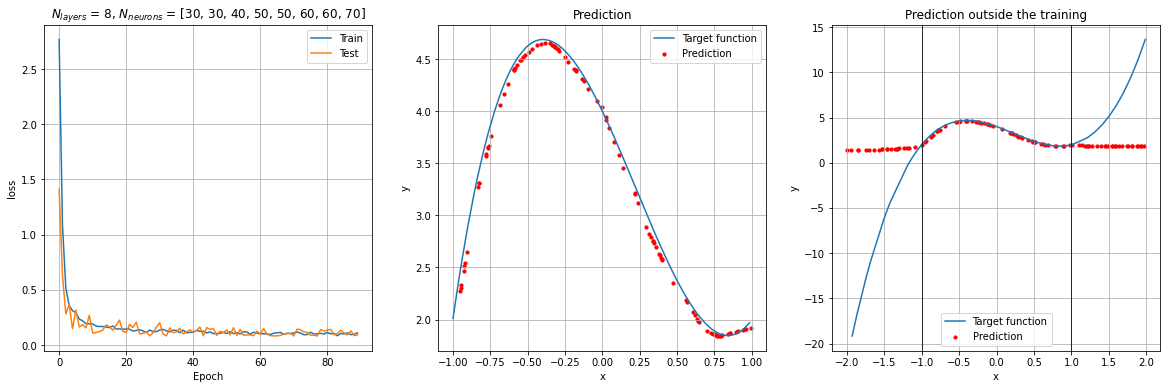

In [ ]:
Neur_sequence = [30,30,40,50,50,60,60,70]
starting_neur = 10
my_act ='relu'
my_opt = 'Nadam'
my_loss = 'mae'

model_different_layer( Neur_sequence, starting_neur)

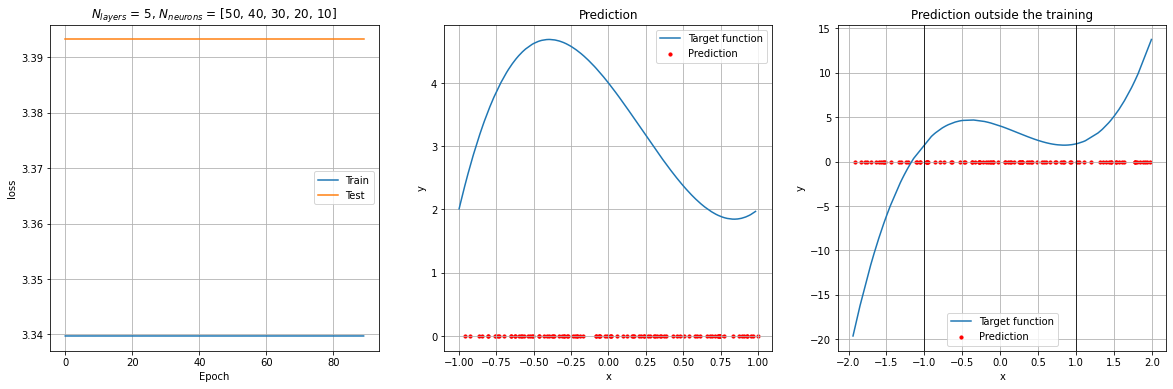

In [ ]:
Neur_sequence = [50,40,30,20,10]
starting_neur = 10
my_act ='relu'
my_opt = 'adam'
my_loss = 'mae'


model_different_layer( Neur_sequence, starting_neur)

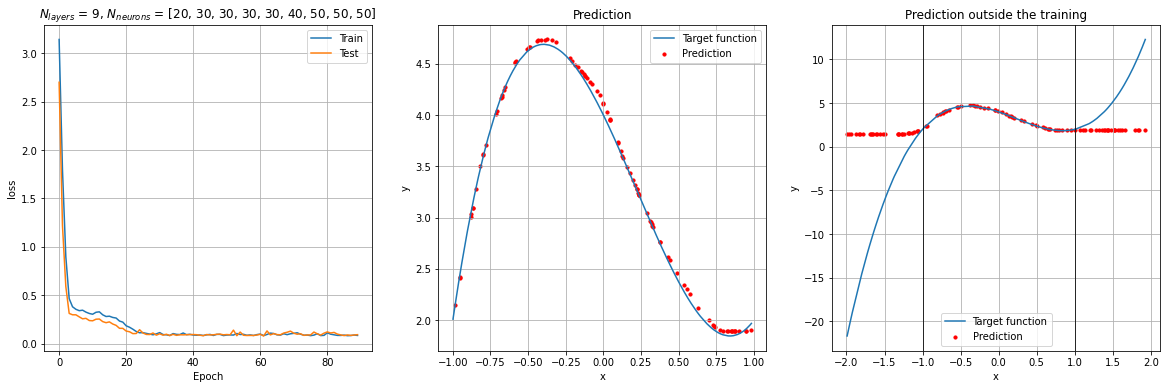

In [ ]:
Neur_sequence = [20,30,30,30,30,40,50,50,50]
starting_neur = 10
my_act ='relu'
my_opt = 'adam'
my_loss = 'mae'


model_different_layer( Neur_sequence, starting_neur)

We see again that the choice of the type of "loss function" can also play a determining role in the success of the network, and that the optimal parameters for one loss function may not necessarily be optimal for the other.

### Conclusion on this exercise
The conclusion for this exercise is that neural networks are a mess! 

In order to get a good fit one has to make several attempts with the different configurations and, using the supervised learning method, it is also evident that it is not possible to obtain a fit of elements outside the training set.

## <span style="color:green">Exercise 11.3 Linear fit</span>

We conclude this Notebook trying to fit the following trigonometric 2D function:
$$
f(x,y) = \sin(x^2+y^2)
$$ 
in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [ ]:
def f(x,y):
  return np.sin(x**2 + y**2)

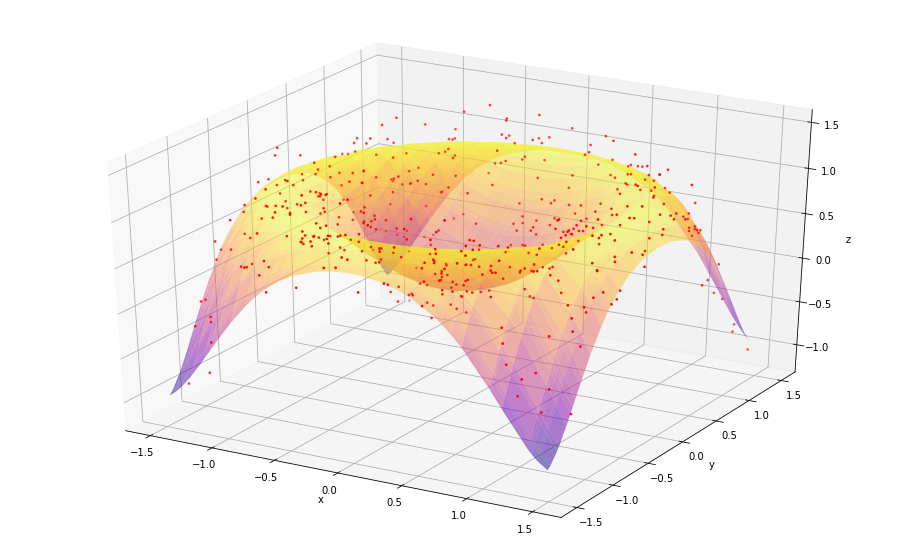

In [ ]:
np.random.seed(0)
x_train = np.random.uniform(-1.5, 1.5, 500)
y_train = np.random.uniform(-1.5,1.5,500)
x_valid = np.random.uniform(-1.5, 1.5, 50)
y_valid = np.random.uniform(-1.5, 1.5, 50)

x_valid.sort()
y_valid.sort()

z_target =  f(x_valid,y_valid) # ideal (target) linear function

sigma = 0.2 # noise standard deviation
z_train = np.random.normal(f(x_train,y_train), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(f(x_valid,y_valid), sigma)

# plot validation and target dataset
fig = plt.figure(figsize = (16, 10))
ax = plt.axes(projection='3d')

X,Y = np.meshgrid(x_valid,y_valid)

ax.plot_surface(X, Y, f(X, Y) , cmap = 'plasma', alpha = 0.5)

ax.scatter(x_train, y_train, z_train, color='r', s=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()


Below are some attempts to construct the correct neural network by applying what was learned from the previous exercises

In [ ]:
# creation of the DNN

my_act    ='relu'  #activation function
my_opt    ='sgd'   # optimizer
my_loss   = 'mse'  # loss function
my_metric = 'mse'  # metric

Neur_sequence = [10,10]
starting_neur = 10
n_epochs = 50



def sin_model(neur_sequence,starting_neur) :
  model = tf.keras.Sequential()
  model.add( Dense(starting_neur, activation = my_act , input_shape=(2,)) )
  for N_neurons in neur_sequence:

     model.add( Dense(N_neurons, activation = my_act, input_shape=(2,) ) )
  model.add(Dense(1, activation=my_act))
  model.compile( optimizer= my_opt,loss= my_loss, metrics=[my_metric])

  history = model.fit(x=np.array([x_train,y_train]).T, y= z_train,
              batch_size=32, epochs=n_epochs,
              shuffle=True, 
              validation_data=(np.array([x_valid, y_valid]).T ,z_valid) )
                
  plt.figure(figsize = (20,6))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("$N_{layers}$ = "+str(len(neur_sequence))+", $N_{neurons}$ = "+str(neur_sequence))
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='best')
  plt.grid(True)
 
  plt.show()

  plt.figure(figsize =(28,15))
  x_predicted = np.random.uniform(-1.5, 1.5, 500)
  y_predicted = np.random.uniform(-1.5,1.5,500)
  z_predicted = model.predict(np.array([x_predicted,y_predicted]).T)
  X_pr,Y_pr, Z_pr = np.meshgrid(x_predicted,y_predicted,z_predicted)

  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, f(X, Y) , cmap = 'bone', alpha = 0.7)

 # ax.scatter(X_pr, Y_pr, Z_pr, color='r', s=3)
  ax.scatter(x_predicted, y_predicted, z_predicted, color='r', s=3)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.set_title("Prediction")
follows

Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5931 - mse: 0.5931 - val_loss: 0.4728 - val_mse: 0.4728
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5931 - mse: 0.5

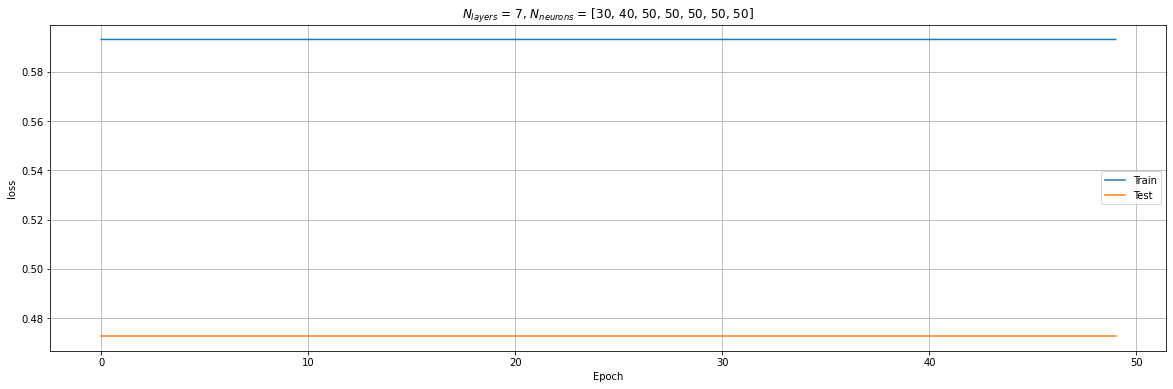

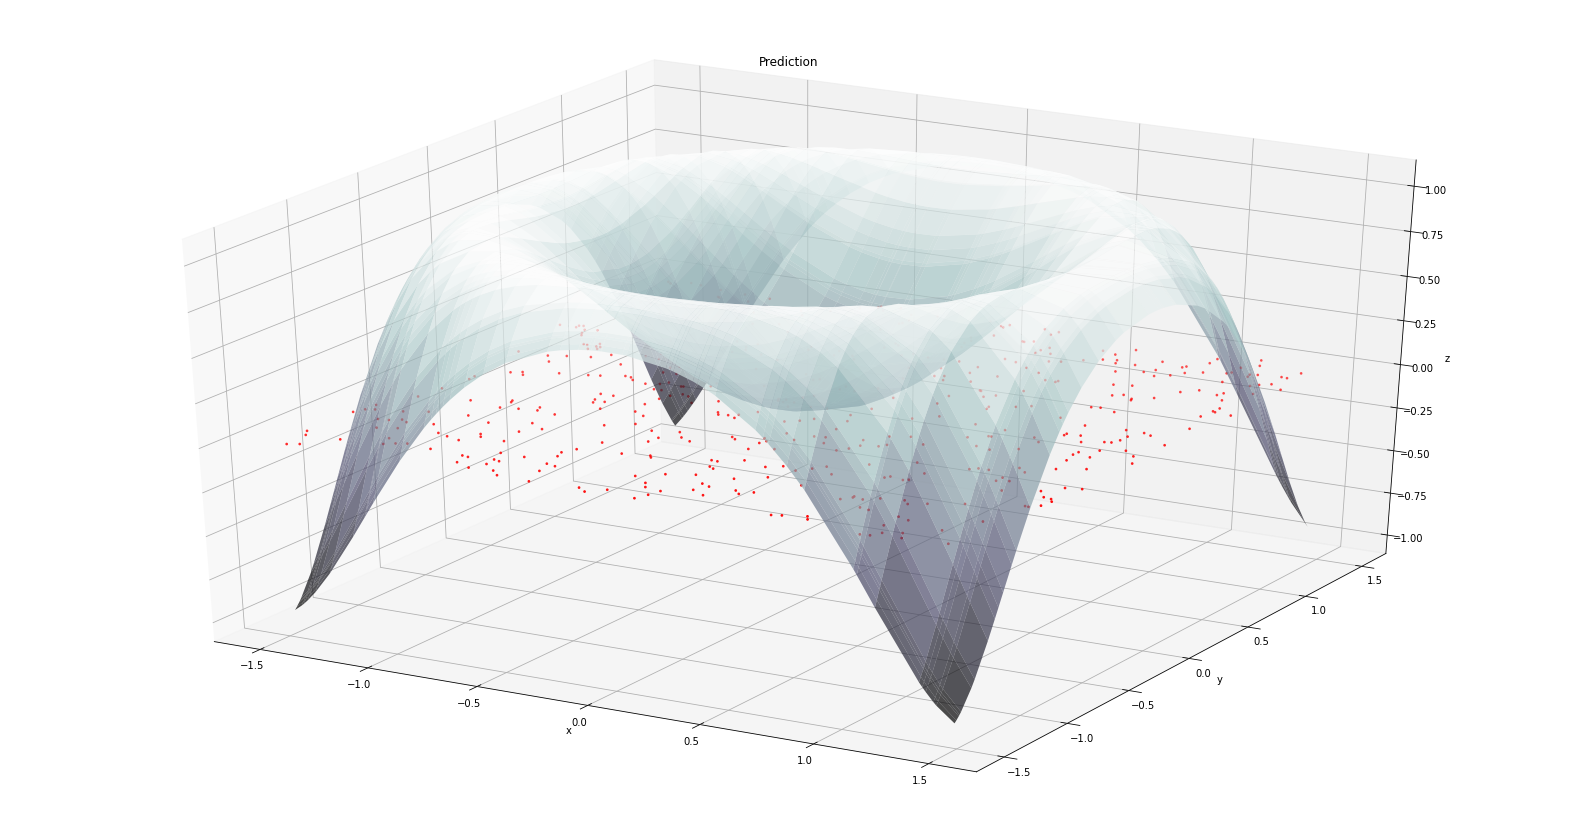

In [ ]:
my_act    ='relu'  #activation function
my_opt    ='sgd'   # optimizer
my_loss   = 'mse'  # loss function
my_metric = 'mse'  # metric

Neur_sequence = [30,40,50,50,50,50,50]
starting_neur = 30

sin_model(Neur_sequence,starting_neur) 

Epoch 1/50
16/16 [==============================] - 2s 13ms/step - loss: 0.3127 - mse: 0.3127 - val_loss: 0.4224 - val_mse: 0.4224
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.2423 - mse: 0.2423 - val_loss: 0.4918 - val_mse: 0.4918
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1595 - mse: 0.1595 - val_loss: 0.4259 - val_mse: 0.4259
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1806 - mse: 0.1806 - val_loss: 0.4589 - val_mse: 0.4589
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1623 - mse: 0.1623 - val_loss: 0.3635 - val_mse: 0.3635
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1371 - mse: 0.1371 - val_loss: 0.3919 - val_mse: 0.3919
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.1251 - mse: 0.1251 - val_loss: 0.3619 - val_mse: 0.3619
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1529 - mse: 0.1

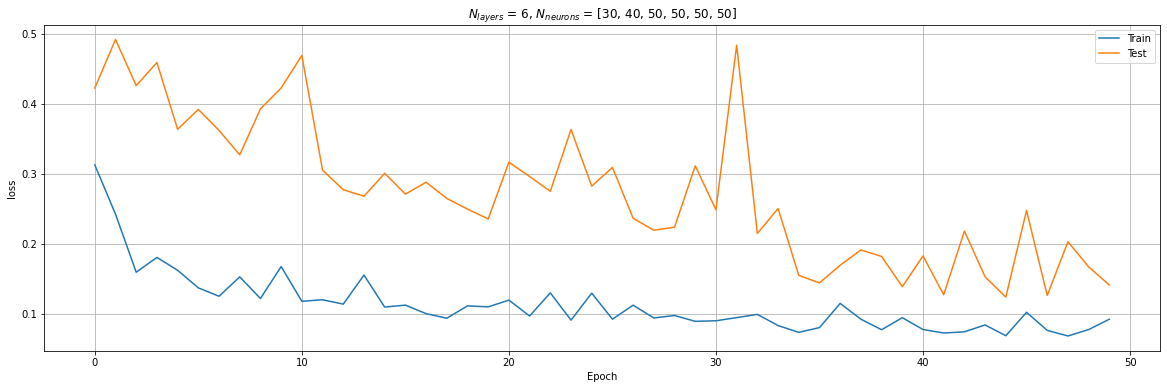

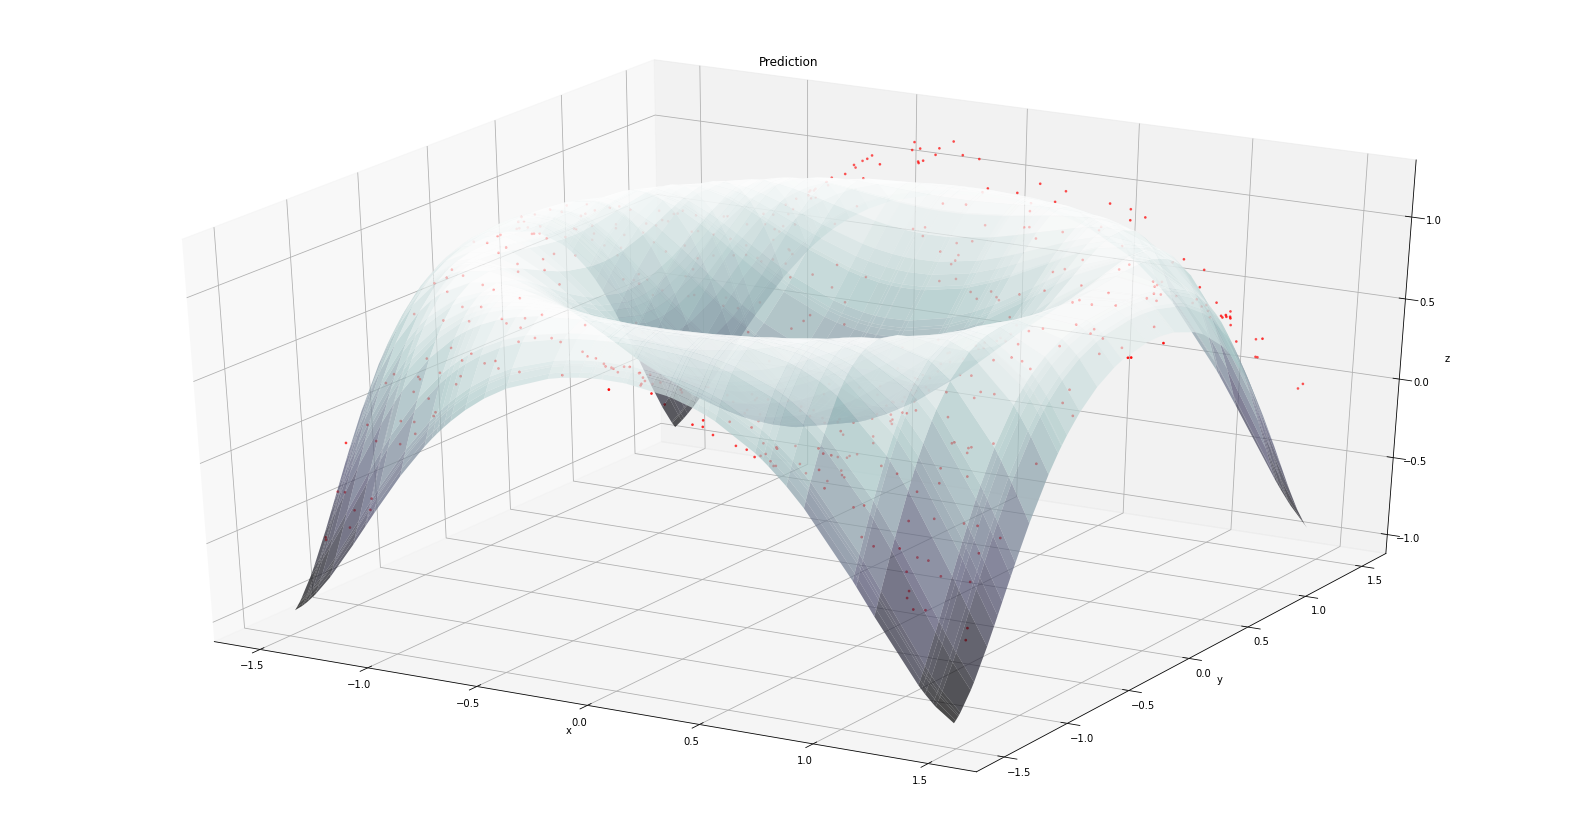

In [ ]:
my_act    ='selu'  #activation function
my_opt    ='Nadam'   # optimizer
my_loss   = 'mse'  # loss function
my_metric = 'mse'  # metric

Neur_sequence = [30,40,50,50,50,50]
starting_neur = 30

sin_model(Neur_sequence,starting_neur) 

Epoch 1/50
16/16 [==============================] - 1s 23ms/step - loss: 0.4676 - mse: 0.4676 - val_loss: 0.4661 - val_mse: 0.4661
Epoch 2/50
16/16 [==============================] - 0s 12ms/step - loss: 0.2114 - mse: 0.2114 - val_loss: 0.6856 - val_mse: 0.6856
Epoch 3/50
16/16 [==============================] - 0s 12ms/step - loss: 0.1903 - mse: 0.1903 - val_loss: 0.6048 - val_mse: 0.6048
Epoch 4/50
16/16 [==============================] - 0s 9ms/step - loss: 0.1819 - mse: 0.1819 - val_loss: 0.6096 - val_mse: 0.6096
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1793 - mse: 0.1793 - val_loss: 0.6144 - val_mse: 0.6144
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1759 - mse: 0.1759 - val_loss: 0.5655 - val_mse: 0.5655
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1708 - mse: 0.1708 - val_loss: 0.5499 - val_mse: 0.5499
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1655 - mse: 0

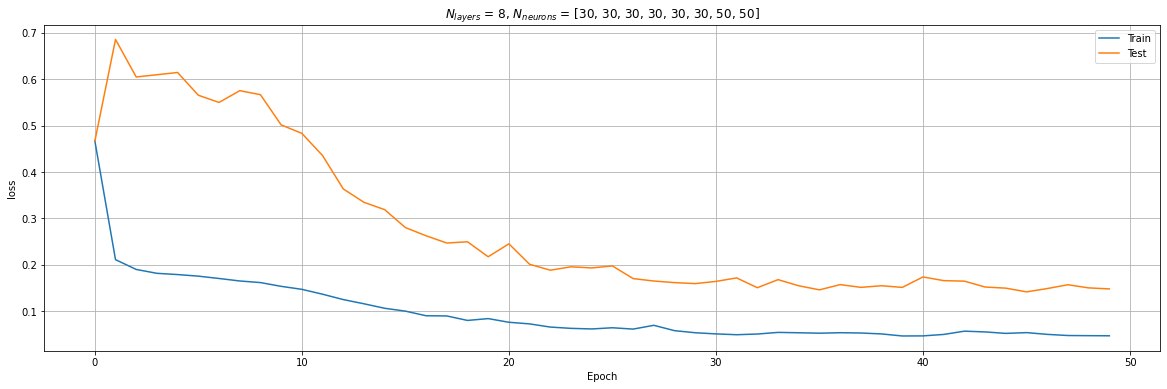

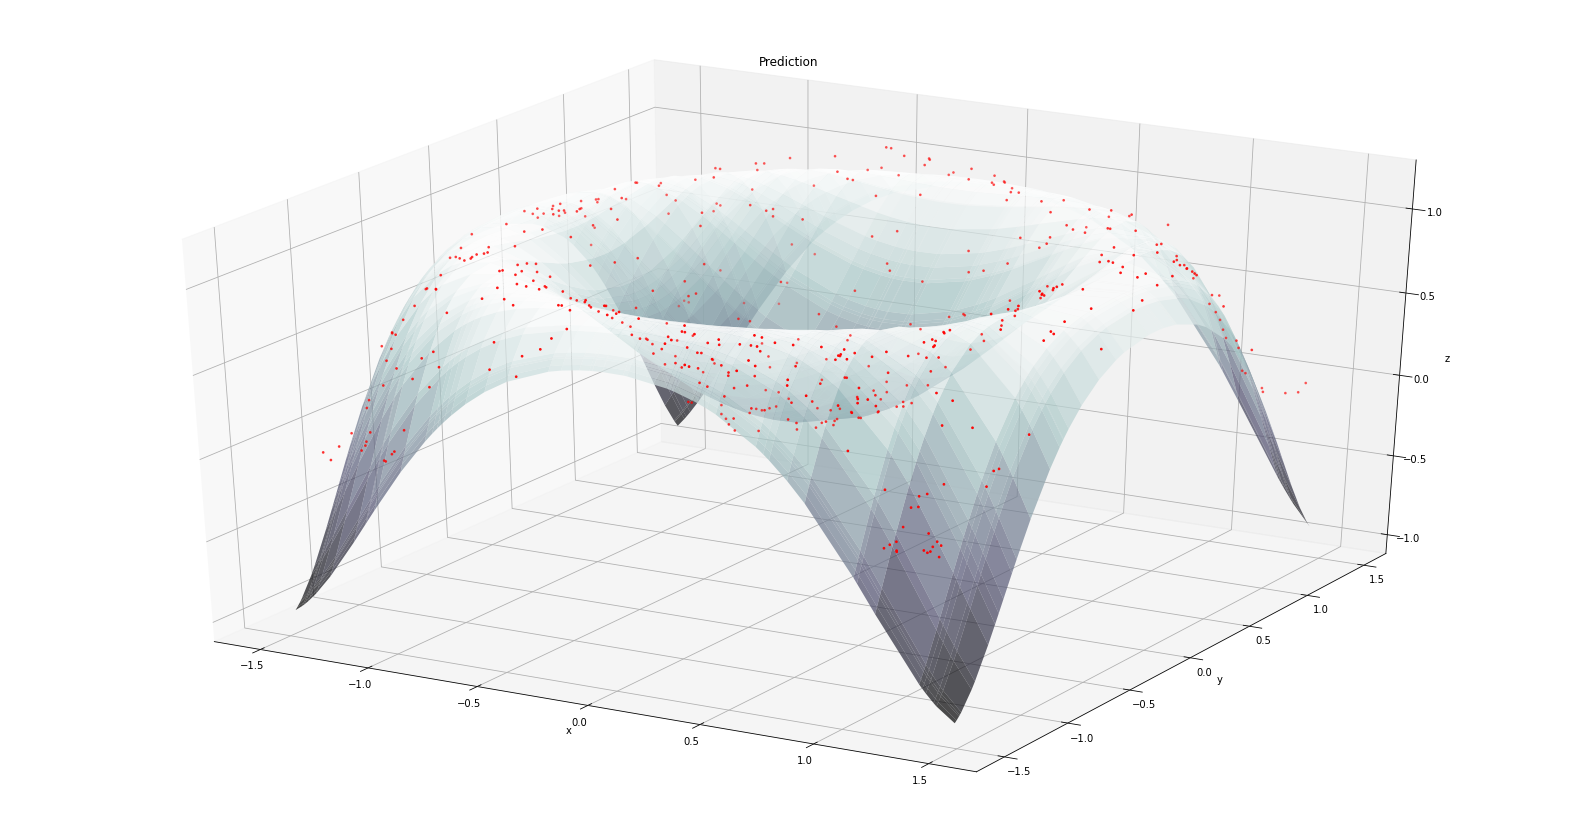

In [ ]:
my_act    ='relu'  #activation function
my_opt    ='adam'   # optimizer
my_loss   = 'mse'  # loss function
my_metric = 'mse'  # metric

Neur_sequence = [30,30,30,30,30,30,50,50]
starting_neur = 30

sin_model(Neur_sequence,starting_neur) 

Epoch 1/50
16/16 [==============================] - 3s 14ms/step - loss: 0.3126 - mse: 0.3126 - val_loss: 0.5937 - val_mse: 0.5937
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1944 - mse: 0.1944 - val_loss: 0.6426 - val_mse: 0.6426
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1959 - mse: 0.1959 - val_loss: 0.5882 - val_mse: 0.5882
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1923 - mse: 0.1923 - val_loss: 0.5998 - val_mse: 0.5998
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1909 - mse: 0.1909 - val_loss: 0.5522 - val_mse: 0.5522
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1886 - mse: 0.1886 - val_loss: 0.5827 - val_mse: 0.5827
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1870 - mse: 0.1870 - val_loss: 0.5329 - val_mse: 0.5329
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.1850 - mse: 0.1

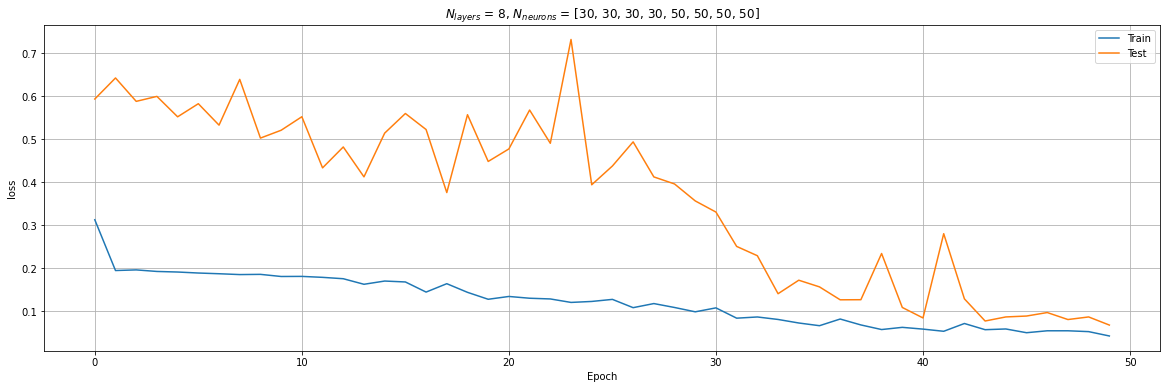

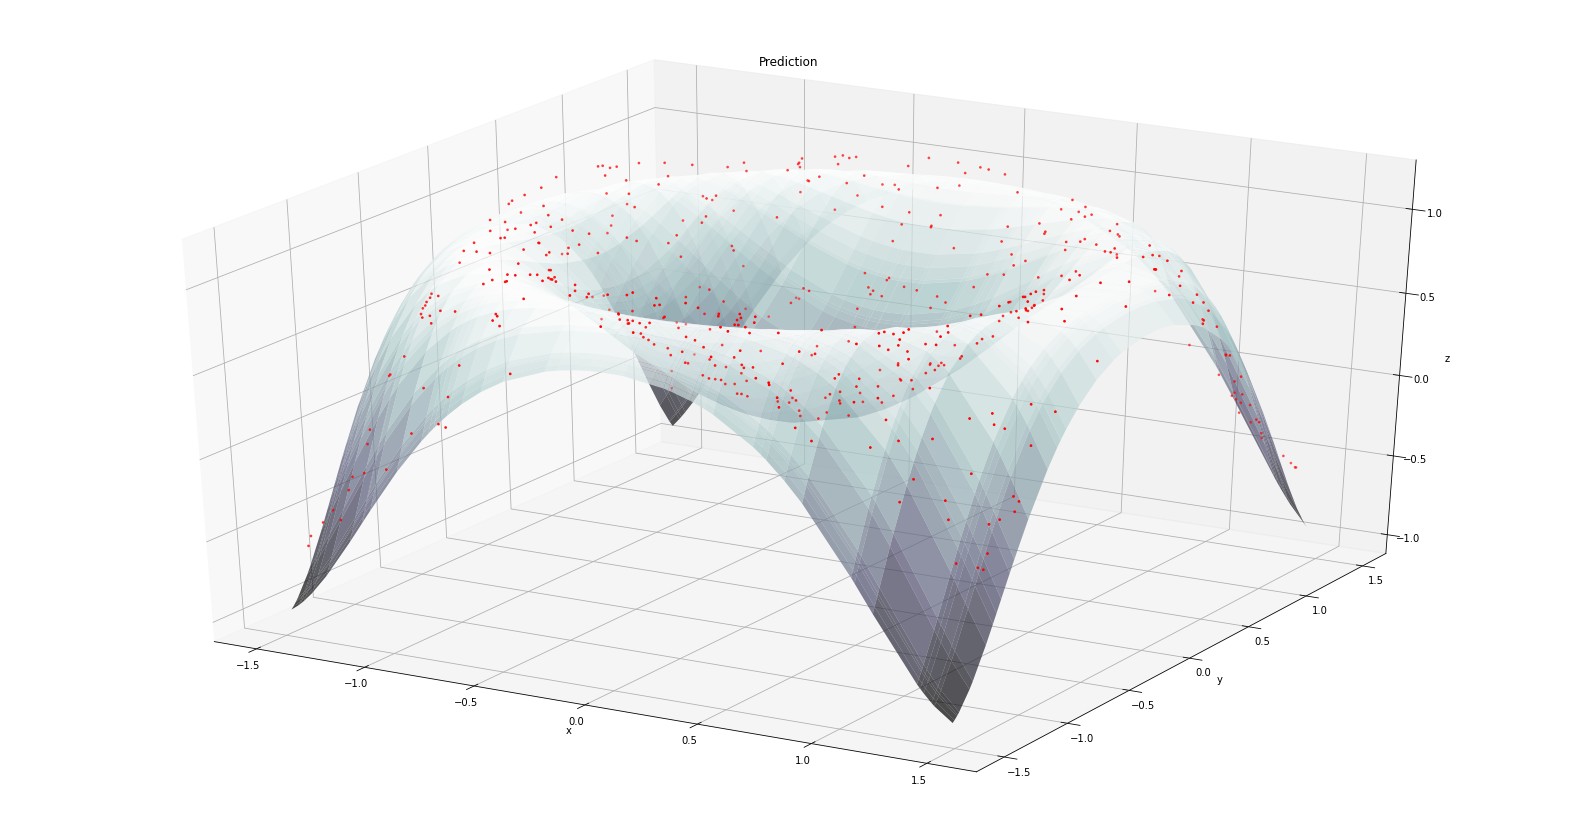

In [ ]:
my_act    ='elu'  #activation function
my_opt    ='Nadam'   # optimizer
my_loss   = 'mse'  # loss function
my_metric = 'mse'  # metric

Neur_sequence = [30,30,30,30,50,50,50,50]
starting_neur = 30

sin_model(Neur_sequence,starting_neur)

The most difficult part of this exercise is to figure out whether the fit we get with a given network is good or not: certainly some of the networks whose results are shown in the graphs above have done their job well and we can consider this by looking at the loss function trends for the test and training parameters but it is still very difficult to tell whether we are fitting the data correctly.